# Introduction - Milestone 2

| **Nama**       | **Heru Ramadhan** |
|----------------|--------------------|
| **Batch**      | HCK - 018          |


**Background**

Liga Premier Inggris (EPL) adalah salah satu liga sepak bola paling bergengsi dan kompetitif dengan jutaan penggemar diseluruh dunia. Aktivitas taruhan pada pertandingan olahraga atau EPL menjadi bagian penting dalam industri taruhan olahraga, dimana agen taruhan terus mencari cara untuk meningkatkan dan menyempurnakan proses pembuatan odds atau peluang. Prediksi tentang hasil pertandingan dapat meningkatkan profitabilitas dan kredibilitas terhadap agen taruhan.

**Problem Statement**

Tujuan projek ini dibuat untuk pengembangan model klasifikasi yang bertujuan untuk memprediksi hasil dan menghasilkan nilai peluang atau odds pada pertandingan Liga Primer Inggris. Model ini dapat mengoptimalkan penawaran taruhan, meminimalisir risiko kerugian, dan meningkatkan margin keuntungan secara keseluruhan.

**Problem Statement Exploration**
1. Bagaimana distribusi hasil pertandingan?
2. Berapa jumlah pertandingan per musim?
3. Bagaimana distribusi kartu Kuning berdasarkan hasil pertandingan?
4. Bagaimana distribusi kartu Merah berdasarkan hasil pertandingan?
5. Bagiamana distribusi hasil pertandingan berdasarkan skor babak pertama?
6. Siapakah team yang paling konsisten mengikuti EPL?

#### Links

- [Link Dataset](https://www.kaggle.com/datasets/irkaal/english-premier-league-results)
- [Link Deployment](https://huggingface.co/spaces/Flickerjet/EPL_Result_Prediction)

<div align="center">

## Data Overview

| Column    | Data Type  | Description                                            | Category  |
|-----------|------------|--------------------------------------------------------|-----------|
| Season    | object     | Match Season                                           | Nominal   |
| DateTime  | object     | Match Date and Time (yyyy-mm-dd hh:mm:ss)              | Nominal   |
| HomeTeam  | object     | Home Team                                              | Nominal   |
| AwayTeam  | object     | Away Team                                              | Nominal   |
| FTHG      | int64      | Full Time Home Team Goals                              | Numerical |
| FTAG      | int64      | Full Time Away Team Goals                              | Numerical |
| FTR       | object     | Full Time Result (H=Home Win, D=Draw, A=Away Win)      | Nominal   |
| HTHG      | float64    | Half Time Home Team Goals                              | Numerical |
| HTAG      | float64    | Half Time Away Team Goals                              | Numerical |
| HTR       | object     | Half Time Result (H=Home Win, D=Draw, A=Away Win)      | Nominal   |
| Referee   | object     | Match Referee                                          | Nominal   |
| HS        | float64    | Home Team Shots                                        | Numerical |
| AS        | float64    | Away Team Shots                                        | Numerical |
| HST       | float64    | Home Team Shots on Target                              | Numerical |
| AST       | float64    | Away Team Shots on Target                              | Numerical |
| HC        | float64    | Home Team Corners                                      | Numerical |
| AC        | float64    | Away Team Corners                                      | Numerical |
| HF        | float64    | Home Team Fouls Committed                              | Numerical |
| AF        | float64    | Away Team Fouls Committed                              | Numerical |
| HY        | float64    | Home Team Yellow Cards                                 | Numerical |
| AY        | float64    | Away Team Yellow Cards                                 | Numerical |
| HR        | float64    | Home Team Red Cards                                    | Numerical |
| AR        | float64    | Away Team Red Cards                                    | Numerical |

</div>


# Import Libraries

In [1]:
# Import Libraries yang dibutuhkan
import pandas as pd
import numpy as np

# library untuk visualisasi data
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# libary untuk train test split data
from sklearn.model_selection import train_test_split

# library untuk capping data
from feature_engine.outliers import Winsorizer

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

# library untuk korelasi check
from scipy.stats import spearmanr, chi2_contingency

# library untuk encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Scaler
from sklearn.preprocessing import MinMaxScaler

# Model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Random search 
from sklearn.model_selection import RandomizedSearchCV

# cross validation
from sklearn.model_selection import cross_val_score

# performance check
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

# Library for warnings
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# model saving
import pickle

# Data Loading

In [2]:
# melakukan penambahan csv kedalam sebuah dataframe
df = pd.read_csv('/Users/Heru/HCK18/Phase 1/Milestone2/p1-ftds018-hck-m2-herurmdn7/P1M2_Heru.csv',encoding='windows-1254')

# melakukan concat untuk memperlihatkan top 10 dan bottom 10
topBottom = pd.concat([df.head(10), df.tail(10)])

# memanggil variabel yang sudah diconcat
topBottom

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-94,1993-08-14T00:00:00Z,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-94,1993-08-14T00:00:00Z,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-94,1993-08-14T00:00:00Z,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-94,1993-08-14T00:00:00Z,Southampton,Everton,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-94,1993-08-14T00:00:00Z,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# show data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

**Setelah melakukan data loading, didapati data sebagai berikut:**
- Data memiliki 18 kolom
- Data berjumlah 4475 baris
- Data memiliki 14 tipe float64
- Data memiliki 4 tipe integer
- Data tidak memiliki tipe object
- Missing value pada 2 kolom

## Data Duplication and Missing Value Check

In [4]:
# cek duplikat pada data
print('jumlah duplikasi data: ', df.duplicated().sum())

# cek missing values pada data
print('jumlah missing value pada data: ', df.isnull().sum())

jumlah duplikasi data:  0
jumlah missing value pada data:  Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64


**Missing Value**
- Terdapat 924 Missing value pada kolom HTHG,HTAG,HTR
- Terdapat 2924 Missing value pada kolom Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR

In [5]:
# cek percentage missing value
print(df.isnull().mean() * 100)

Season       0.000000
DateTime     0.000000
HomeTeam     0.000000
AwayTeam     0.000000
FTHG         0.000000
FTAG         0.000000
FTR          0.000000
HTHG         8.314587
HTAG         8.314587
HTR          8.314587
Referee     25.411680
HS          25.411680
AS          25.411680
HST         25.411680
AST         25.411680
HC          25.411680
AC          25.411680
HF          25.411680
AF          25.411680
HY          25.411680
AY          25.411680
HR          25.411680
AR          25.411680
dtype: float64


**Persentase Missing Value** <br>
Nilai missing value pada data ini sebesar 33% dari jumlah seluruh data

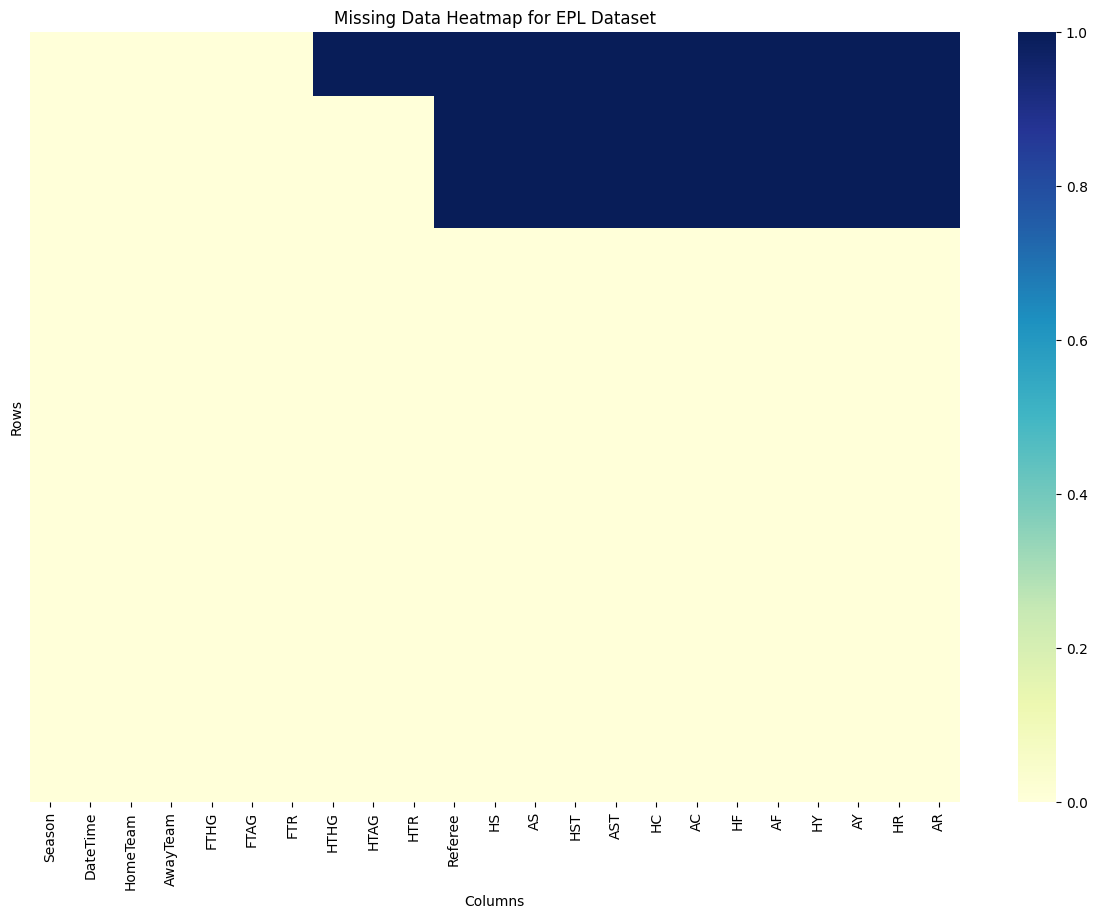

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'epl_data' is your DataFrame
# Set the figure size
plt.figure(figsize=(15, 10))

# Create the heatmap for missing data
sns.heatmap(df.isnull(), cbar=True, cmap='YlGnBu', yticklabels=False)

# Add titles and labels
plt.title('Missing Data Heatmap for EPL Dataset')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the plot
plt.show()


Berdasarkan Heatmap diatas, missing value terjadi hanya pada rentang waktu atau baris tertentu, terdapat pattern terhadap beberapa kolom dimana data hilang secara konsisten. 

In [7]:
# Group the data by 'Season' and calculate the number of missing values for each column in each season
missing_by_season = df.groupby('Season').apply(lambda x: x.isnull().sum())

# Calculate the total number of entries for each season
total_entries_by_season = df['Season'].value_counts()

# Calculate the percentage of missing values for each column in each season
missing_percentage_by_season = missing_by_season.div(total_entries_by_season, axis=0) * 100

pd.set_option('display.max_columns', None)  # Show all columns

# Display the missing values by season
display(missing_percentage_by_season)



,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
Season,,,,,,,,,,,,,,,,,,,,,,,
1993-94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1994-95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1995-96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1996-97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1997-98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1998-99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1999-00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2000-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Berdasarkan hasil pengecekan missing value diatas, Missing value terjadi pada musim atau season tertentu, yaitu musim 1993 - 2000. Maka missing value ini bersifat MAR atau Missing at Random, dimana data yang hilang tidak sepenuhnya random tetapi beruhubungan dengan periode waktu terentu

In [8]:
# Filter the data for the 93s to 2000
seasons_to_include = ['1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99', '1999-00']
data_90_2000 = df[df['Season'].isin(seasons_to_include)]
data_90_2000

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,1999-00,2000-05-14T00:00:00Z,Sheffield Weds,Leicester,4,0,H,2.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2820,1999-00,2000-05-14T00:00:00Z,Southampton,Wimbledon,2,0,H,0.0,0.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,1999-00,2000-05-14T00:00:00Z,Tottenham,Sunderland,3,1,H,1.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2822,1999-00,2000-05-14T00:00:00Z,Watford,Coventry,1,0,H,1.0,0.0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Setelah melakukan filter season, dapat dipastikan missing values berada diantara season 1993 - 2000

# Eploratory Data Analysis (EDA)

In [9]:
# melakukan copy pada dataframe
df1 = df.copy()

# memperlihatkan 10 row terbawah dari dataframe tersebut
df1.tail(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11103,2021-22,2022-04-08T20:00:00Z,Newcastle,Wolves,1,0,H,0.0,0.0,D,P Bankes,12.0,5.0,4.0,2.0,1.0,2.0,6.0,13.0,1.0,1.0,0.0,0.0
11104,2021-22,2022-04-09T12:30:00Z,Everton,Man United,1,0,H,1.0,0.0,H,J Moss,7.0,12.0,3.0,4.0,5.0,7.0,4.0,10.0,2.0,2.0,0.0,0.0
11105,2021-22,2022-04-09T15:00:00Z,Arsenal,Brighton,1,2,A,0.0,1.0,A,D Coote,20.0,8.0,4.0,3.0,11.0,2.0,12.0,19.0,3.0,4.0,0.0,0.0
11106,2021-22,2022-04-09T15:00:00Z,Southampton,Chelsea,0,6,A,0.0,4.0,A,K Friend,4.0,24.0,1.0,14.0,3.0,3.0,11.0,10.0,1.0,0.0,0.0,0.0
11107,2021-22,2022-04-09T15:00:00Z,Watford,Leeds,0,3,A,0.0,1.0,A,A Marriner,8.0,10.0,1.0,5.0,3.0,8.0,8.0,12.0,2.0,0.0,0.0,0.0
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,G Scott,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,M Atkinson,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,R Jones,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,M Oliver,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,A Taylor,11.0,6.0,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


## Bagaimana Distribusi Hasil Pertandingan?

In [10]:
proportion = df1['FTR'].value_counts().reset_index()
display(proportion)
fig = px.pie(proportion, names="FTR", 
              values="count", 
              title="Dataset proportion",
              hover_data=["count"], 
              )
fig.show()

,FTR,count
0,H,5088
1,A,3161
2,D,2864


**Insight**
- Home win sebanyak 45% pada data
- Away win sebanyak 28.4% pada data
- Draw sebanyak 25.8% pada data
- Terjadi slightly imbalanced pada data

## Berapa Jumlah Pertandingan per Musim?

In [11]:
# Menghitung jumlah row per season
totalMatch = df1['Season'].value_counts().reset_index()

# display data 
display(totalMatch)

# visualisasi 

fig = px.bar(totalMatch, x='Season', y='count', orientation='v',text_auto='.2s')
fig.update_layout(xaxis= dict(type='category', categoryorder = "category ascending"))
fig.show()


,Season,count
0,1993-94,462
1,1994-95,462
2,1995-96,380
3,1996-97,380
4,1997-98,380
5,1998-99,380
6,1999-00,380
7,2000-01,380
8,2001-02,380
9,2002-03,380


**Insight:**
- Jumlah match pada musim 1993-94 dan 1994-95 berjumlah 460, memiliki 80 match lebih banyak dibandingkan musim setelahnya
- Jumlah match stabil di 380 match permusim
- Hanya terdapat 310 match pada 2021 dikarenakan musim masih berjalan ketika data ini diambil

## Bagaimana Distribusi kartu kuning Berdasasrkan Hasil Pertandingan?

In [12]:
# Menghitung jumlah kartu kuning dan kartu merah berdasarkan hasil pertandingan
totalCard = df1.groupby('FTR').sum().reset_index()

# Membuat plot untuk kartu kuning
fig_yellow = px.bar(totalCard, x='FTR', y=['HY', 'AY'], barmode='group', 
                    labels={'FTR': 'Hasil Pertandingan', 'value': 'Jumlah Kartu Kuning', 'variable': 'Tim'})

# Menampilkan plot
fig_yellow.show()

**Insight:**
- Distribusi Kartu Kuning jika hasil Away Win relatif tidak jauh berbeda
- Distribusi Kartu Kuning lebih banyak dilakukan oleh team away ketika hasil pertandingan dimenangkan oleh tim home atau tuan rumah

## Bagaimana Distribusi kartu Merah Berdasasrkan Hasil Pertandingan?

In [13]:
# Membuat plot untuk kartu merah
fig_red = px.bar(totalCard, x='FTR', y=['HR', 'AR'], barmode='group', 
                 title='Distribusi Kartu Merah Berdasarkan Hasil Pertandingan',
                 labels={'FTR': 'Hasil Pertandingan', 'value': 'Jumlah Kartu Merah', 'variable': 'Tim'})
fig_red.show()

**Insight**
- Distribusi Kartu Merah akan lebih banyak terjadi di team yang mengalami kekalahan
- Distribusi Kartu Merah paling tinggi terjadi pada hasil Home win dimana team Away memiliki jumlah kartu merah lebih banyak 3 kali lipat

## Bagaimana Distribusi Hasil Pertandingan Berdasarkan Skor Babak Pertama?

In [14]:
# Menggabungkan skor babak pertama menjadi satu kolom
df1['HT_Score'] = df1['HTHG'].astype(str) + '-' + df1['HTAG'].astype(str)

# Menghitung distribusi hasil pertandingan berdasarkan skor babak pertama
ht_distribution = df1.groupby(['HT_Score', 'FTR']).size().reset_index(name='Count')

# Membuat plot menggunakan Plotly
fig = px.bar(ht_distribution, x='HT_Score', y='Count', color='FTR', barmode='group',
             title='Distribusi Hasil Pertandingan Berdasarkan Skor Babak Pertama',
             labels={'HT_Score': 'Skor Babak Pertama', 'Count': 'Jumlah Pertandingan', 'FTR': 'Hasil Pertandingan'})

# Menampilkan plot
fig.show()

**Insight**
- Banyak pertandingan yang memiliki hasil draw pada half-time
- Tim Home memiliki keunggulan walaupun relatif kecil 
- Tim Away Jarang memimpin pertandingan saat half time

## Siapakah team yang paling konsisten mengikuti EPL?

In [15]:
# Menghitung jumlah row per season
totalTeam = df1['HomeTeam'].value_counts().reset_index()

# top 5
b = totalTeam.head(5)
# display data 
display(b)

# visualisasi 

fig = px.bar(b, x='HomeTeam', y='count', orientation='v')
fig.show()


,HomeTeam,count
0,Arsenal,552
1,Man United,552
2,Everton,551
3,Tottenham,551
4,Liverpool,551


**Insight**
- 5 tim yang konsisten di EPL menandakan bahwa tim berikut dapat mempengaruhi hasil pertandingan
- Arsenal dan ManUnited sebagai tim yang paling konsisten semenjak season 1993 dimulai

# Feature Engineering

In [16]:
# melakukan copy pada dataframe
df2 = df.copy()

# memperlihatkan 10 row teratas dari dataframe tersebut
df2.head(10)

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1993-94,1993-08-14T00:00:00Z,Newcastle,Tottenham,0,1,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1993-94,1993-08-14T00:00:00Z,Oldham,Ipswich,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1993-94,1993-08-14T00:00:00Z,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1993-94,1993-08-14T00:00:00Z,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1993-94,1993-08-14T00:00:00Z,West Ham,Wimbledon,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling Missing Values

In [17]:
# cek duplikat pada data
print('jumlah duplikasi data: ', df2.duplicated().sum())

# cek missing values pada data
print('jumlah missing value pada data: ', df2.isnull().sum())

jumlah duplikasi data:  0
jumlah missing value pada data:  Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64


**Melakukan Check Ulang pada Missing Value**
- Terdapat 924 Missing value pada kolom HTHG,HTAG,HTR
- Terdapat 2924 Missing value pada kolom Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR

In [18]:
# Melakukan drop missing value pada dataframe df3
df2.dropna(inplace=True)
print('jumlah missing value pada data: ', df2.duplicated().sum())

jumlah missing value pada data:  0


## Cardinality Test

In [19]:
# membuat function untuk cek cardinalitas data
def cardinality_func(dataframe):

    # membuat empty list
    columns = []
    nunique = []
    unique = []

    # memilih kolom bertipe object
    for column in dataframe:
        columns.append(column)
        nunique.append(dataframe[column].nunique())
        unique.append(dataframe[column].unique())

    # membuat dataframe 
    cardinality_df = pd.DataFrame({
    'nama kolom' : columns,
    'jumlah unique' : nunique,
    'unique':unique})

    return cardinality_df

# memanggil function 
cardinality_func(df2)

,nama kolom,jumlah unique,unique
0,Season,22,"[2000-01, 2001-02, 2002-03, 2003-04, 2004-05, ..."
1,DateTime,2675,"[2000-08-19T00:00:00Z, 2000-08-20T00:00:00Z, 2..."
2,HomeTeam,44,"[Charlton, Chelsea, Coventry, Derby, Leeds, Le..."
3,AwayTeam,44,"[Man City, West Ham, Middlesbrough, Southampto..."
4,FTHG,10,"[4, 1, 2, 0, 3, 5, 6, 7, 8, 9]"
5,FTAG,9,"[0, 2, 3, 1, 4, 5, 6, 7, 9]"
6,FTR,3,"[H, A, D]"
7,HTHG,6,"[2.0, 1.0, 0.0, 3.0, 5.0, 4.0]"
8,HTAG,6,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]"
9,HTR,3,"[H, D, A]"


**Cardinality test insight:**
- Ada banyak variasi dalam kolom statistik seperti shots, corner, fouls, dan kartu.
- Beberapa kolom seperti Referee,DateTime,Season memiliki jumlah unik yang sangat tinggi, sehingga lebih baik didrop agar tidak menambah kompleksitas model dan terjadinya overfitting pada model.

## Dropping Columns

Melakukan drop column berdasarkan hasil analisa cardinality test.

In [20]:
# drop column temporary
df2 = df2.drop(columns=['Season','DateTime','Referee'])

# show top 5 row
df2.head(5)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,Charlton,Man City,4,0,H,2.0,0.0,H,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,Chelsea,West Ham,4,2,H,1.0,0.0,H,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,Derby,Southampton,2,2,D,1.0,2.0,A,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,Leeds,Everton,2,0,H,2.0,0.0,H,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


## Remapping Target Columns

Mengubah Value Target menjadi numerical.

In [21]:
# urutan
urutanTarget = {'H': 0, 'A':1, 'D': 2}

# apply urutan
df2['FTR'] = df2['FTR'].map(urutanTarget)

In [22]:
df2

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,Charlton,Man City,4,0,0,2.0,0.0,H,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,Chelsea,West Ham,4,2,0,1.0,0.0,H,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,Coventry,Middlesbrough,1,3,1,1.0,1.0,D,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,Derby,Southampton,2,2,2,1.0,2.0,A,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,Leeds,Everton,2,0,0,2.0,0.0,H,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,Aston Villa,Tottenham,0,4,1,0.0,1.0,A,9.0,11.0,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,Brentford,West Ham,2,0,0,0.0,0.0,D,15.0,5.0,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,Leicester,Crystal Palace,2,1,0,2.0,0.0,H,12.0,11.0,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,Norwich,Burnley,2,0,0,1.0,0.0,H,17.0,18.0,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


**Target:**
- Home Win = 0
- Away Win = 1
- Draw = 2

## Split Train Test

In [23]:
# Melakukan split data menjadi X dan Y
# X berisi kolom selain target
X = df2.drop(['FTR'],axis=1)

# Y berisi kolom target
y = df2['FTR']

In [24]:
# melakukan split data dengan menggunakan 15% data sebagai data testing dan randomisasi 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=14)

In [25]:
# Check ukuran data
print(f'Train set : {X_train.shape}')
print(f'test set : {X_test.shape}')

Train set : (7045, 19)
test set : (1244, 19)


- Data Trainset berukuran 7045 row dan 19 kolom
- Data Test set berukuran 1244 row dan 19 kolom

## Outlier Handling

In [26]:
# Membuat function untuk menghitung nilai skew, upper dan lower boundary, dan outlier
def outlier_analysis(data):

    # membuat dataframe dan empty list
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    type = []
    has_outliers = [] 

    # menseleksi kolom dengan memilih numerik kolom saja
    num_columns = data.select_dtypes(include=['int64','float64'])
    # Loop 
    for col in num_columns:
        col_name.append(col)

        # skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # extreme skewed upper and lower boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)
            type.append('extreme skew')

        # Moderate skewed
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)
            type.append('moderate skew')

        # Normal
        else:
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
            type.append('normal skew')
        
        # append nilai upper dan lower ke empty list 
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # pengecekan outlier
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Menambahkan list sebelumnya ke dalam sebuah dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['skew type'] = type
    result['has_outliers'] = has_outliers  

    return result

# memanggil function dan membuat variabel baru
outliercheck = outlier_analysis(X_train)

# memanggil variabel
outliercheck

,columns,skewness,upper boundary,lower boundary,skew type,has_outliers
0,FTHG,1.012542,5.000000,-2.000000,extreme skew,True
1,FTAG,1.089311,8.000000,-6.000000,extreme skew,True
2,HTHG,1.227355,4.000000,-3.000000,extreme skew,True
3,HTAG,1.449221,4.000000,-3.000000,extreme skew,True
4,HS,0.614613,27.500000,-0.500000,moderate skew,True
5,AS,0.648264,22.000000,-2.000000,moderate skew,True
6,HST,0.792852,14.000000,-2.000000,moderate skew,True
7,AST,0.865555,10.500000,-1.500000,moderate skew,True
8,HC,0.641294,14.000000,-2.000000,moderate skew,True
9,AC,0.720244,10.500000,-1.500000,moderate skew,True


- Semua Kolom memiliki outliers
- Terdapat 2 kolom dengan Distribusi Normal yaitu:
  - `HF`
  - `AF`
- Terdapat 6 kolom dengan Distribusi Extreme yaitu:
  - `FTHG`
  - `FTAG`
  - `HTHG`
  - `HTAG`
  - `HR`
  - `AR`
- Terdapat 8 kolom dengan Distribusi Moderate yaitu:
  - `HS`
  - `AS`
  - `HST`
  - `AST`
  - `HC`
  - `AC`
  - `HY`
  - `AY`
- Namun kolom `HR` dan `AR` memiliki upper dan lower boundary 0, dimana 2 kolom ini tidak akan diikutsertakan dalam proses capping

In [27]:
# List kolom yang mempunyai outlier
haveOutlier = outliercheck[(outliercheck['has_outliers']==True)]['columns'].tolist()
haveOutlier

['FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HF',
 'AF',
 'HY',
 'AY',
 'HR',
 'AR']

## Data Capping

Melakukan capping outlier pada data

In [28]:
# filter data yang mempunyai distribusi normal
normalskew = outliercheck[(outliercheck['skew type']=='normal skew')]['columns'].tolist()

# Capping distribusi normal
winsoriser_fare = Winsorizer(
    capping_method='gaussian',
    tail='both',
    fold=3,
    variables=normalskew
)

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

In [29]:
# filter data yang mempunyai distribusi moderate dan extreme
restskew = ['FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HC',
 'AC',
 'HY',
 'AY']
# Capping 
winsoriser_fare = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    variables=restskew
)

X_train_capped = winsoriser_fare.fit_transform(X_train_capped)
X_test_capped = winsoriser_fare.transform(X_test_capped)

### Visualization

Visualisasi outlier pada data, perbandingan antara sebelum dan sesudah dilakukannya capping.

In [30]:
# function untuk membuat histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

FTHG - Before Capping


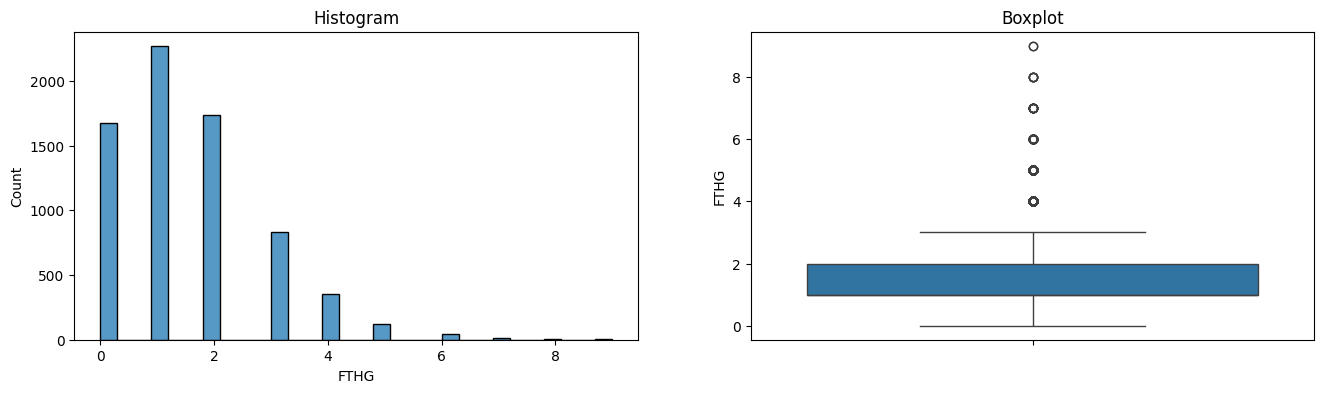


FTHG - After Capping


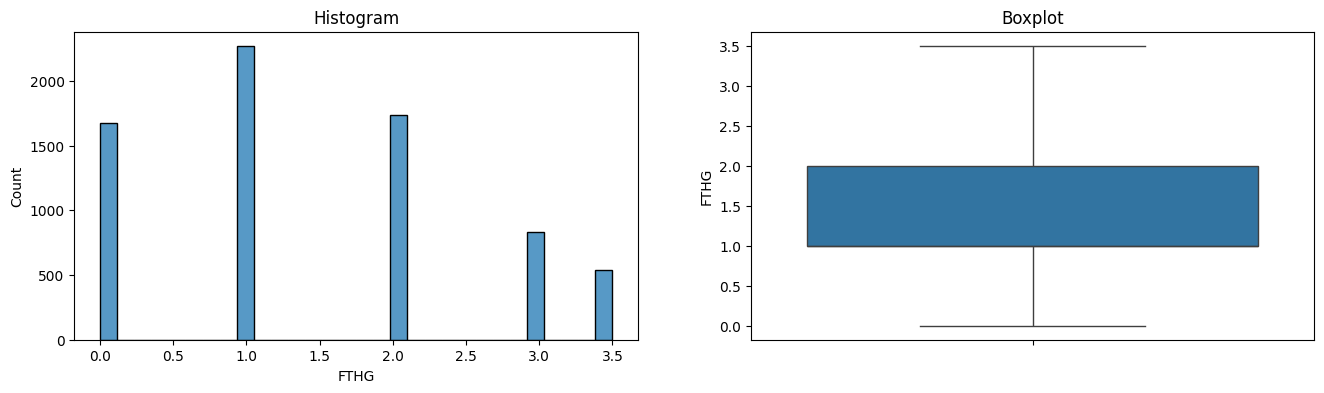

FTAG - Before Capping


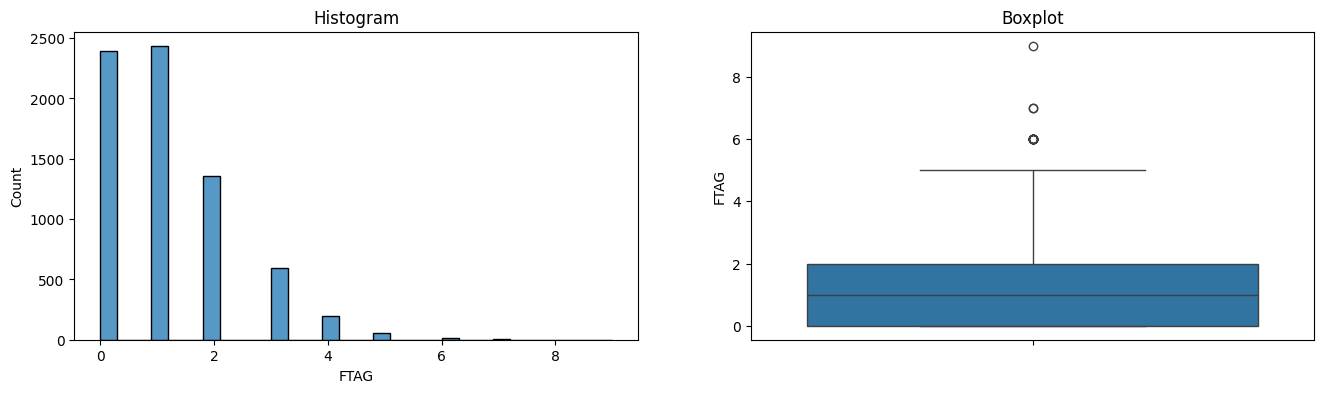


FTAG - After Capping


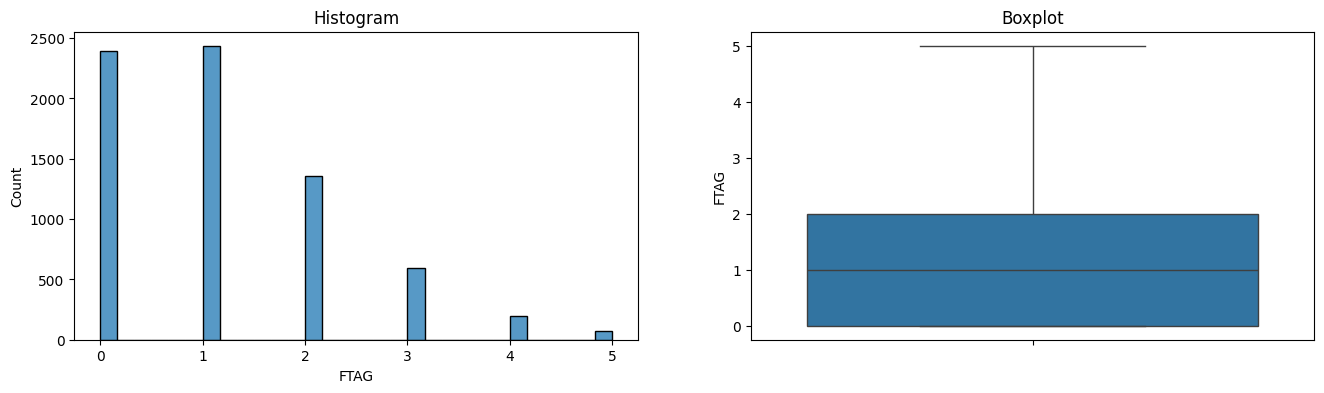

HTHG - Before Capping


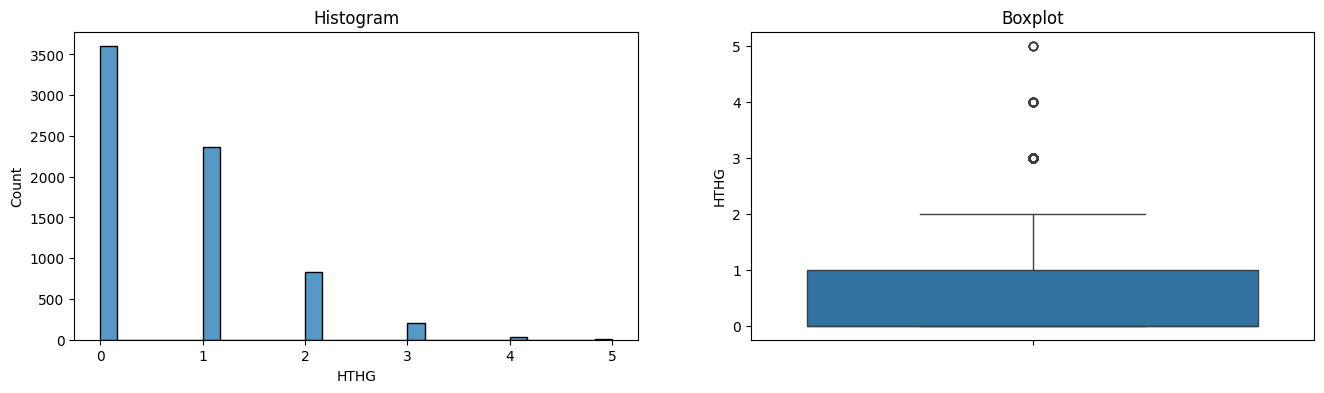


HTHG - After Capping


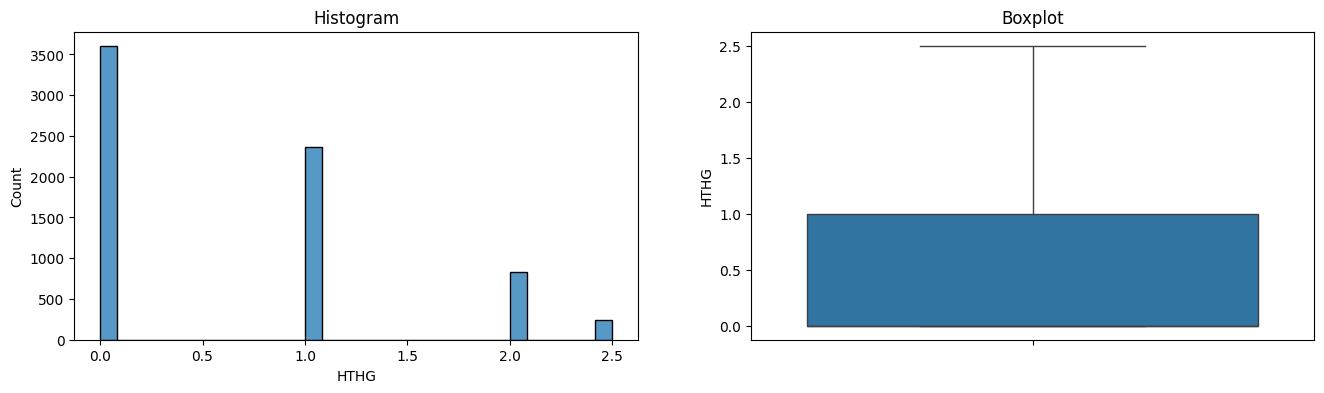

HTAG - Before Capping


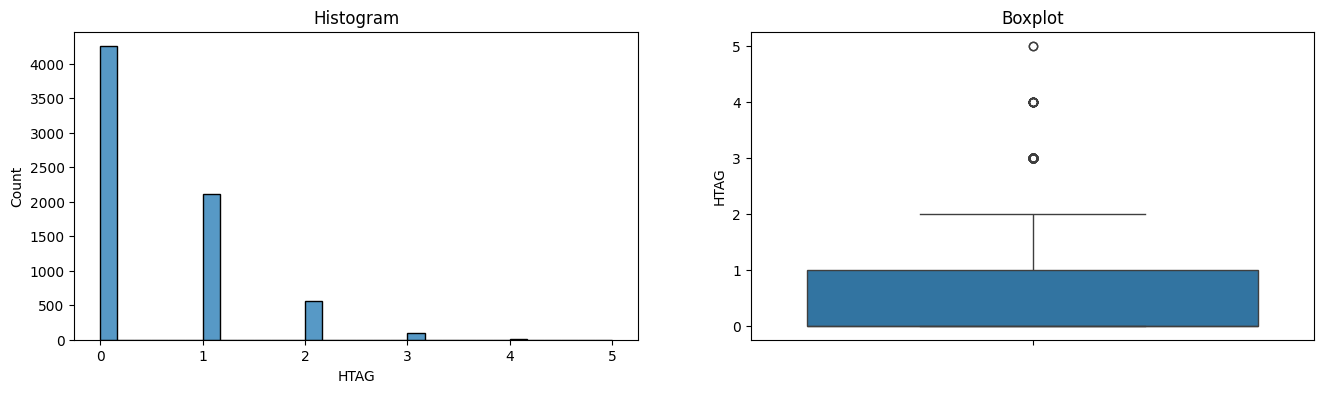


HTAG - After Capping


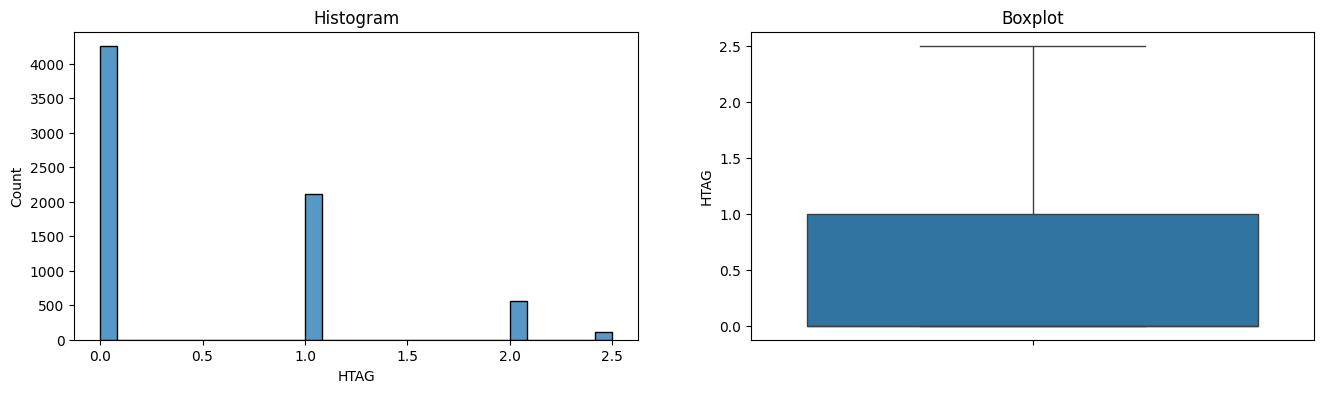

HS - Before Capping


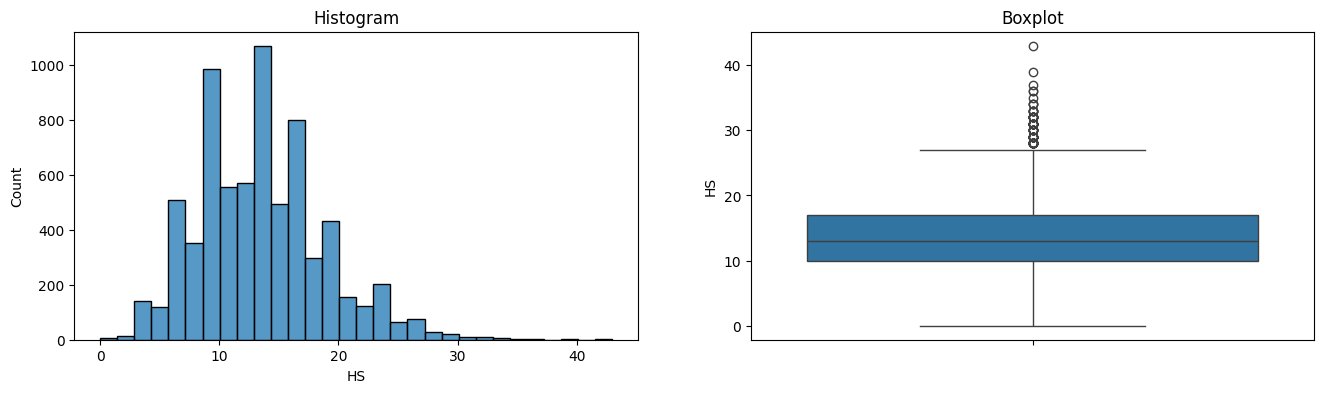


HS - After Capping


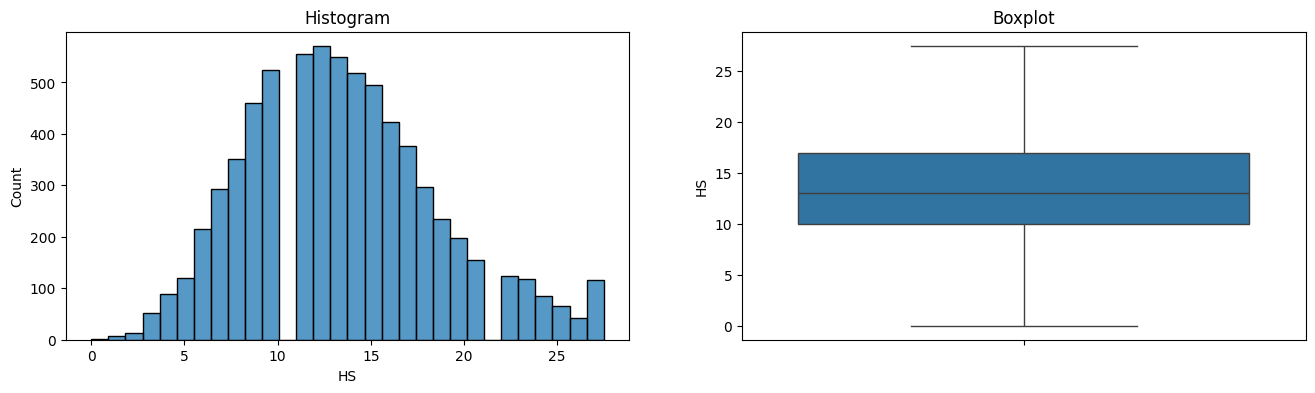

AS - Before Capping


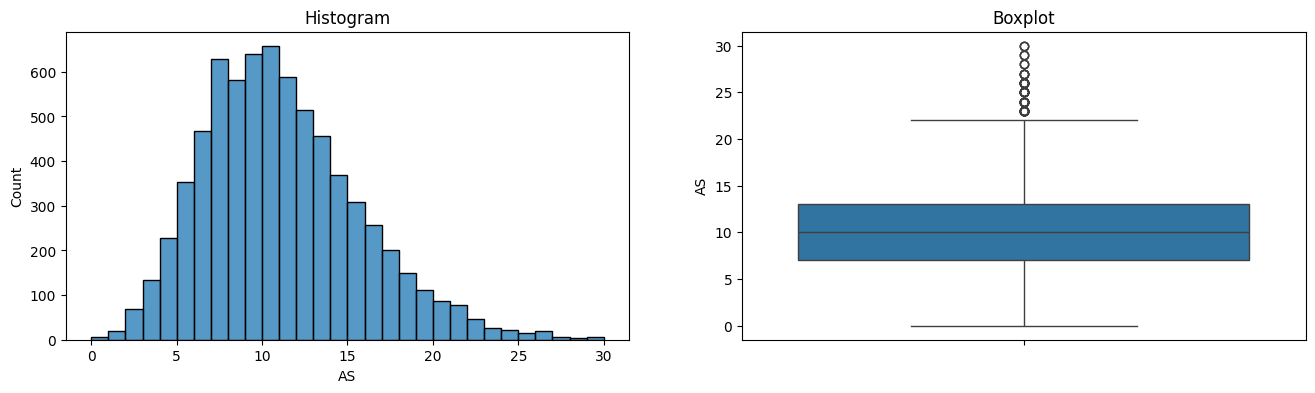


AS - After Capping


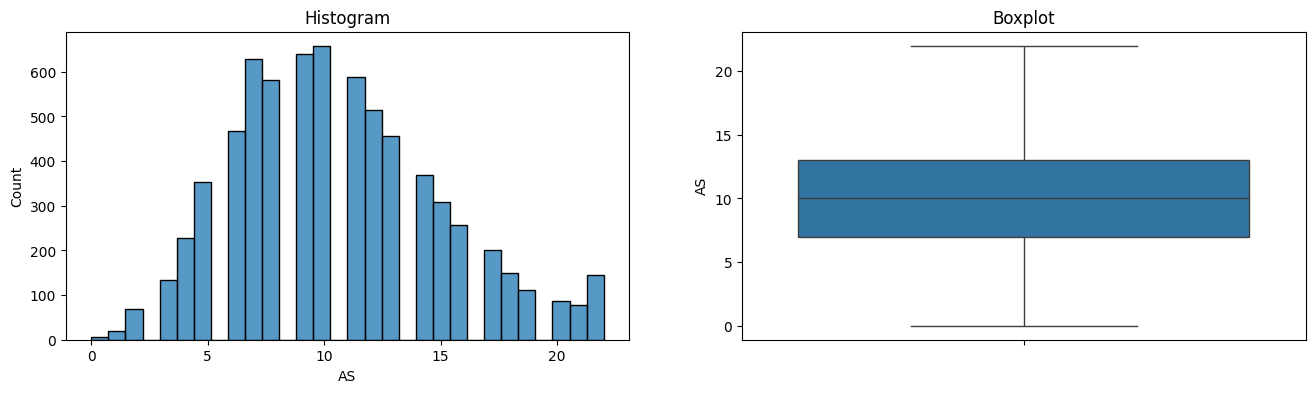

HST - Before Capping


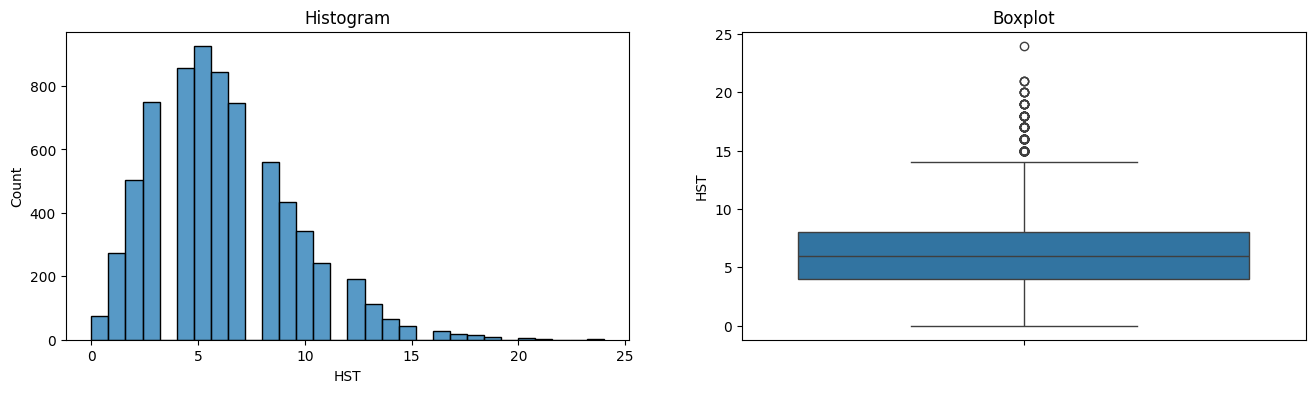


HST - After Capping


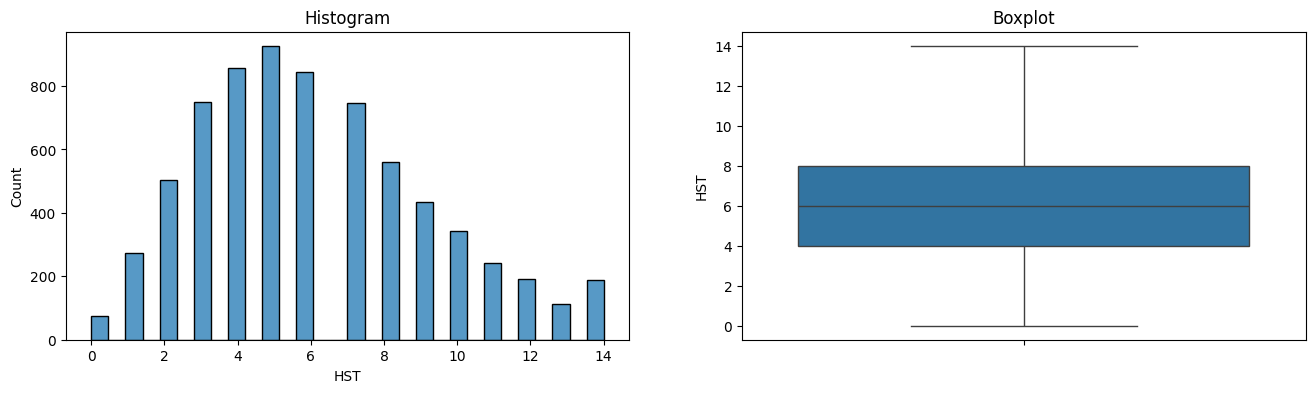

AST - Before Capping


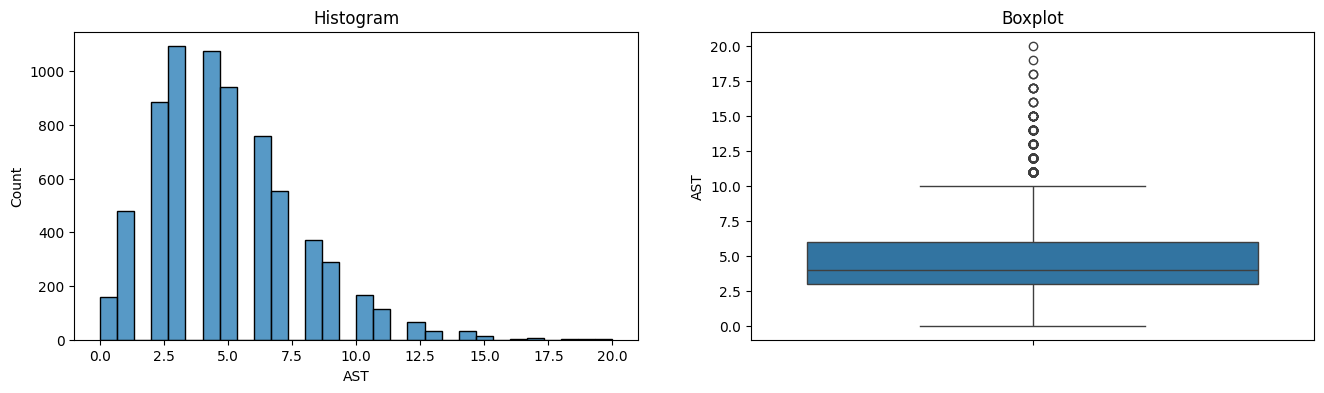


AST - After Capping


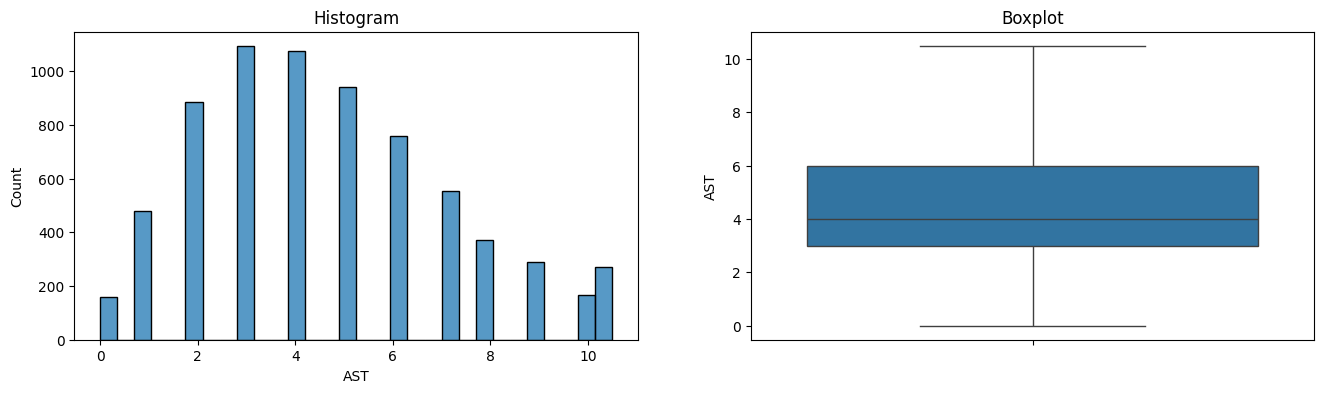

HC - Before Capping


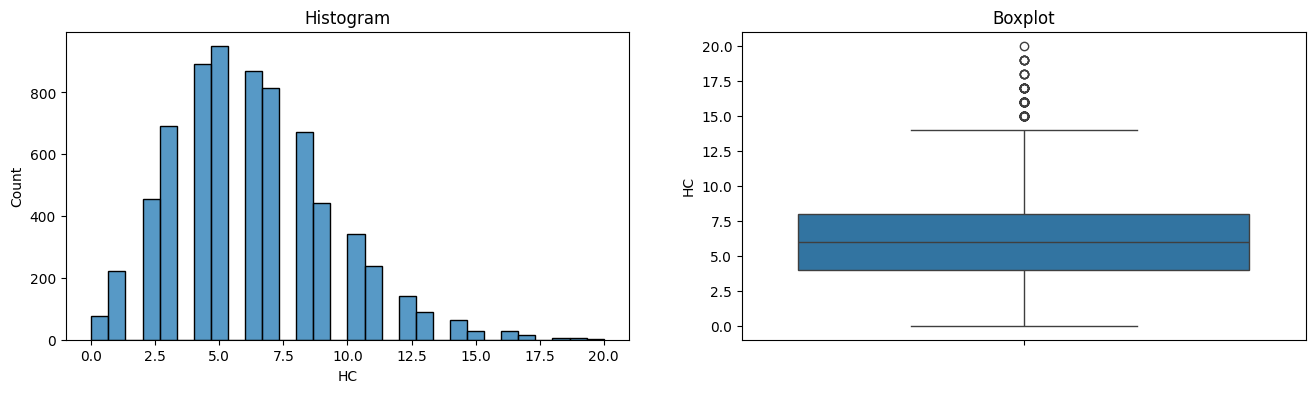


HC - After Capping


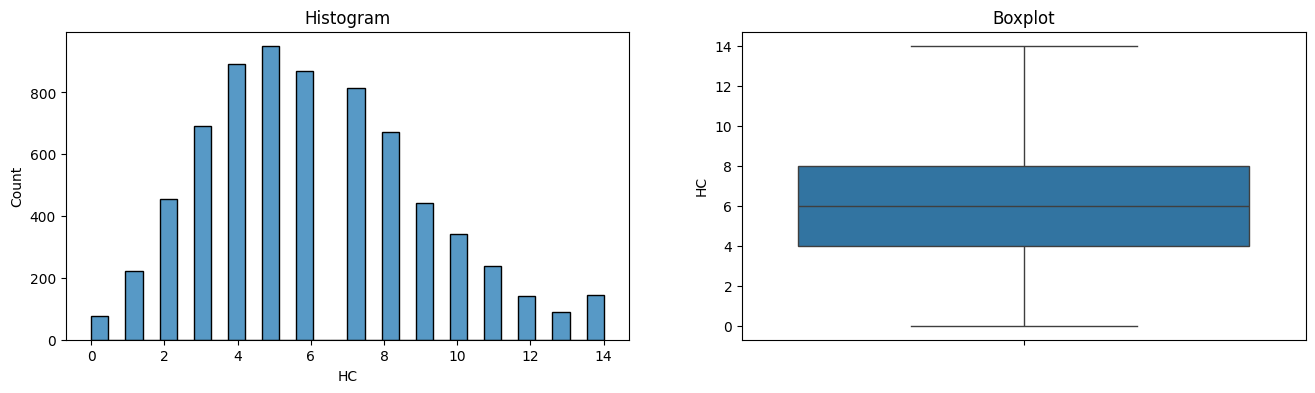

AC - Before Capping


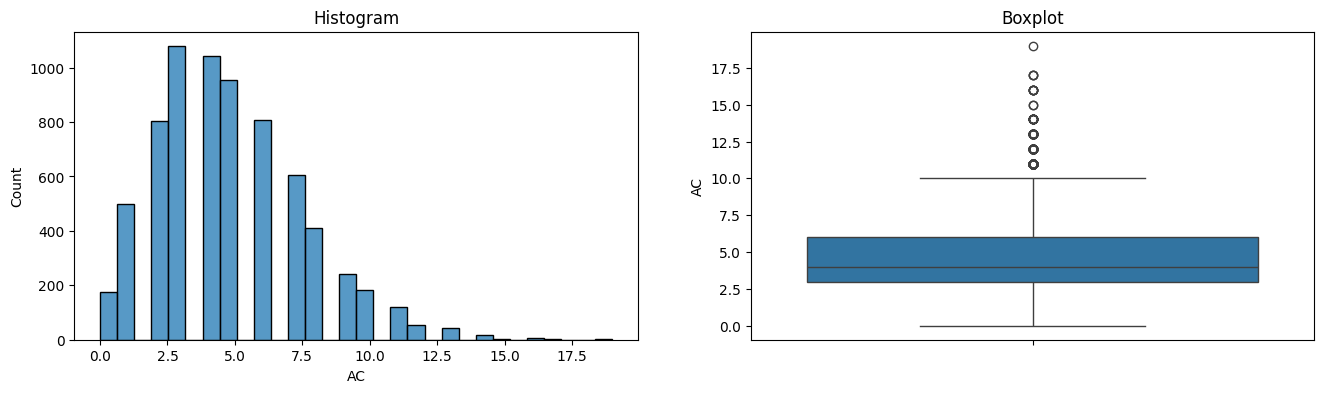


AC - After Capping


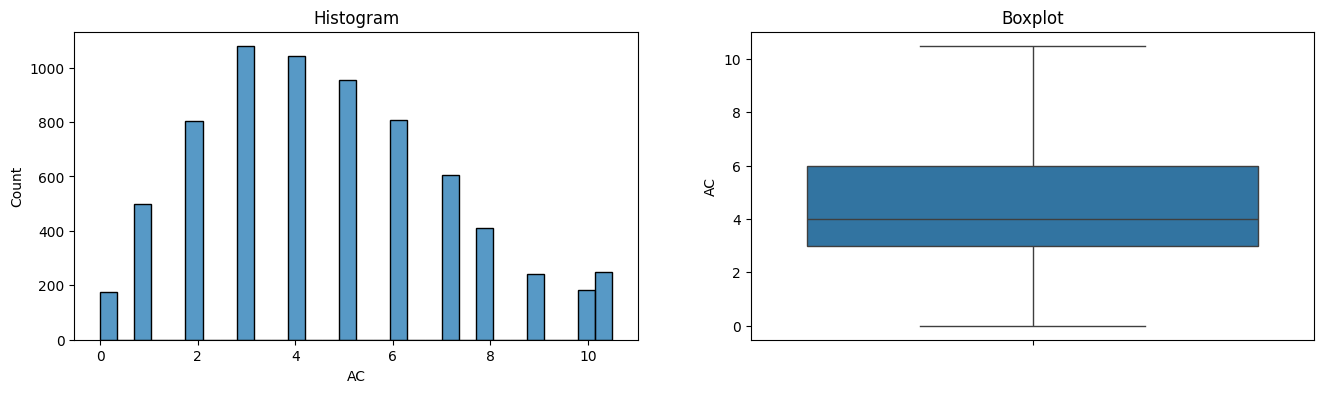

HF - Before Capping


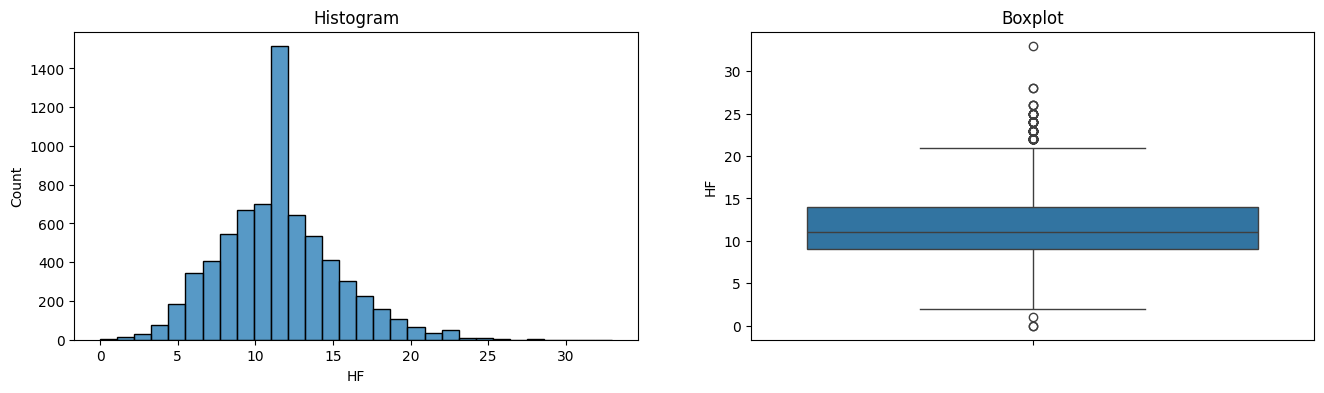


HF - After Capping


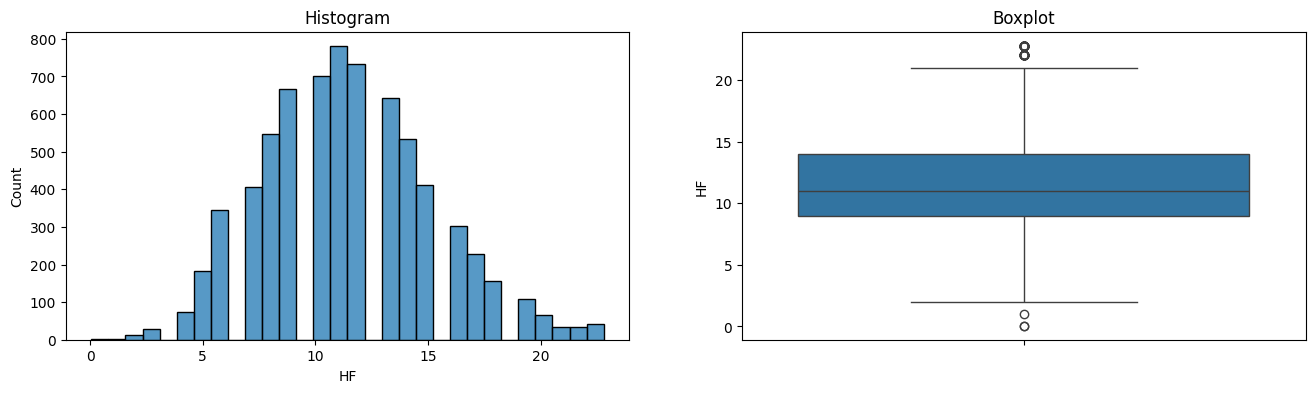

AF - Before Capping


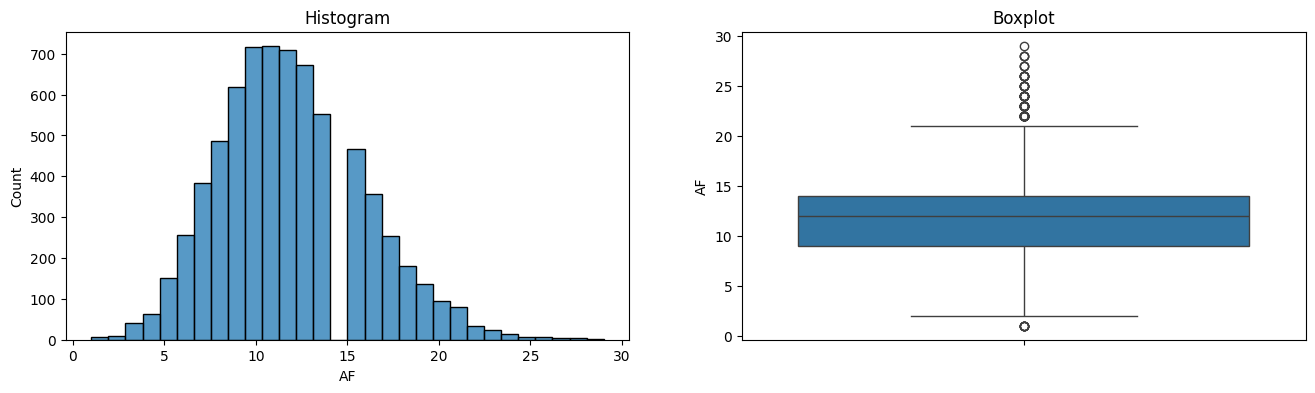


AF - After Capping


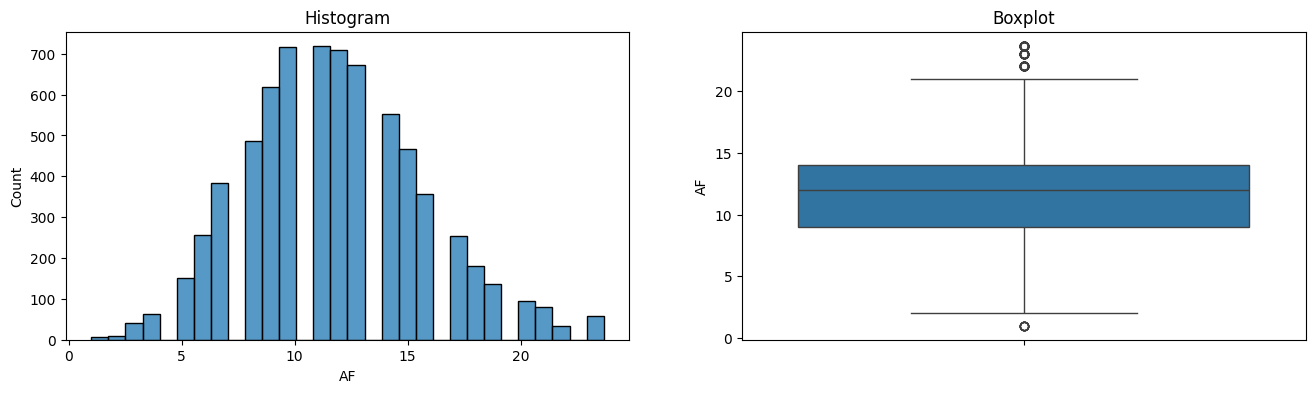

HY - Before Capping


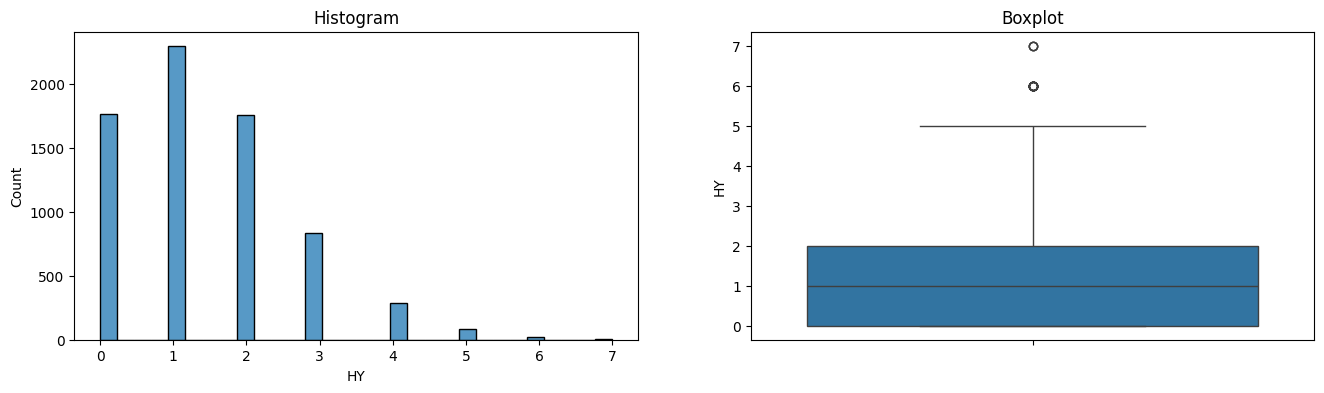


HY - After Capping


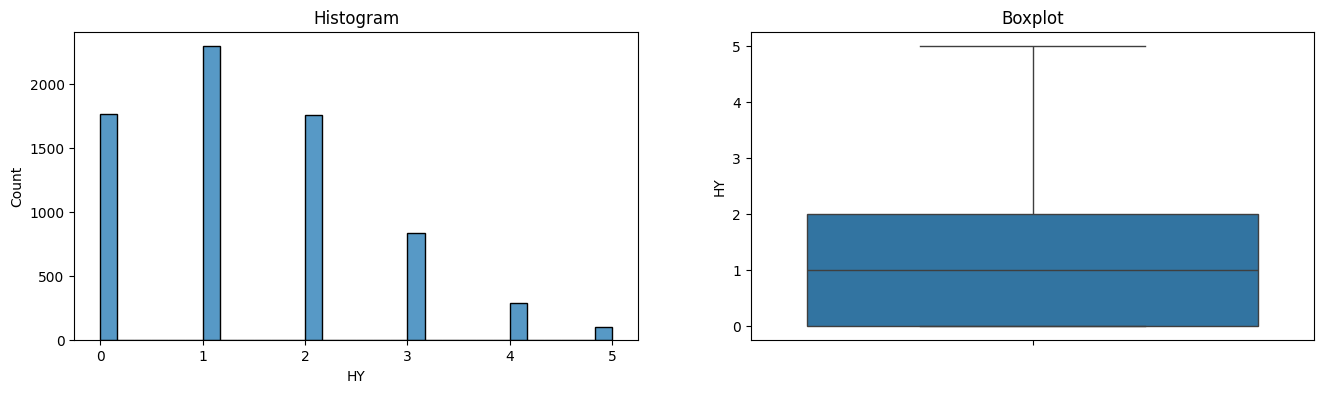

AY - Before Capping


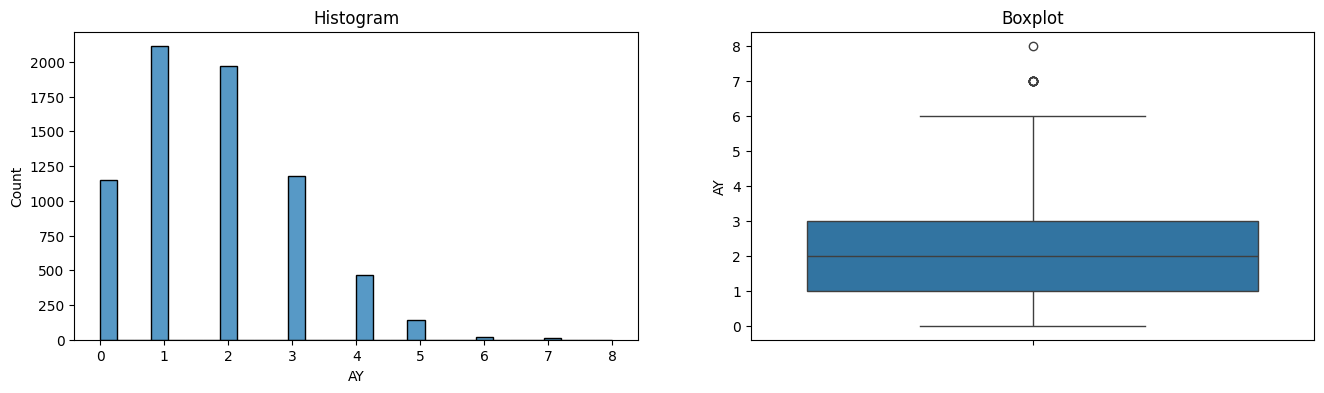


AY - After Capping


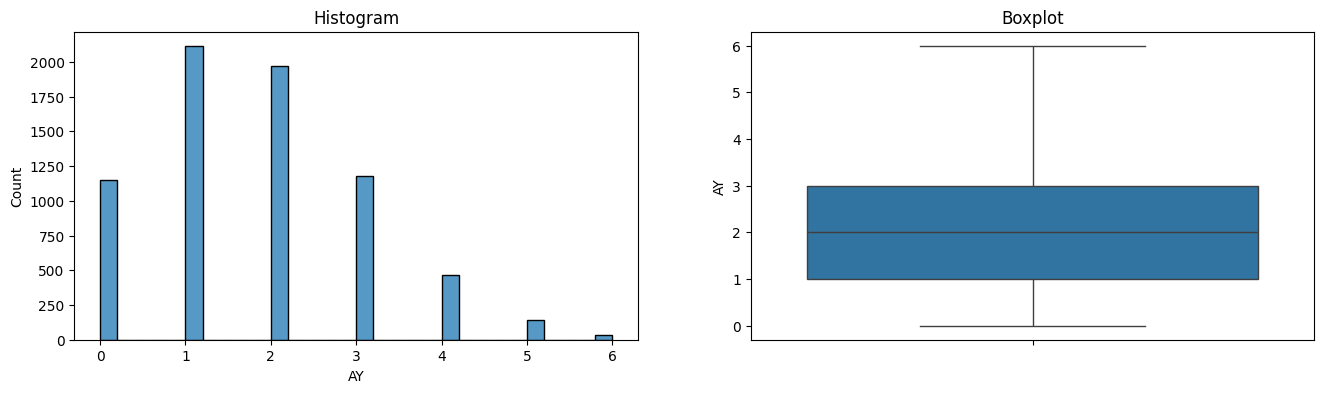

HR - Before Capping


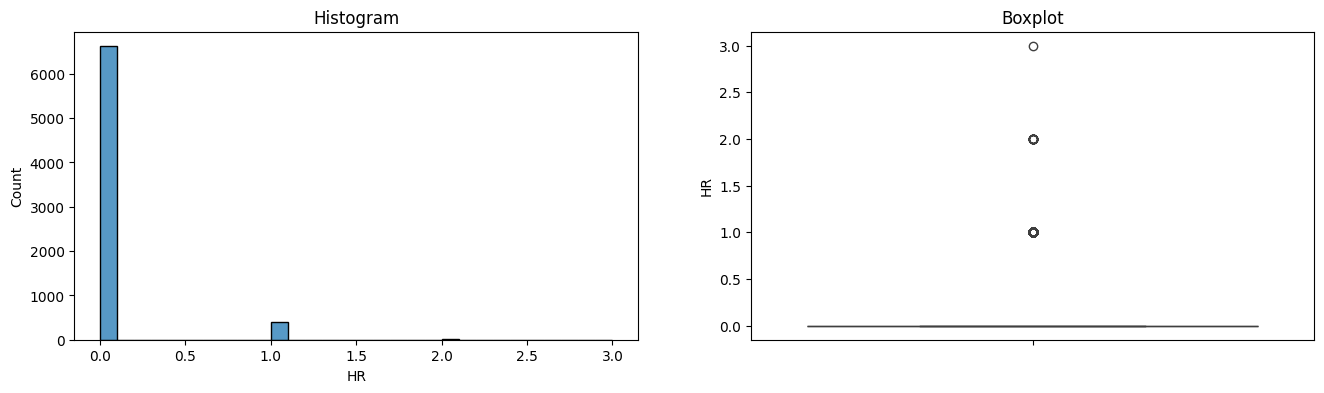


HR - After Capping


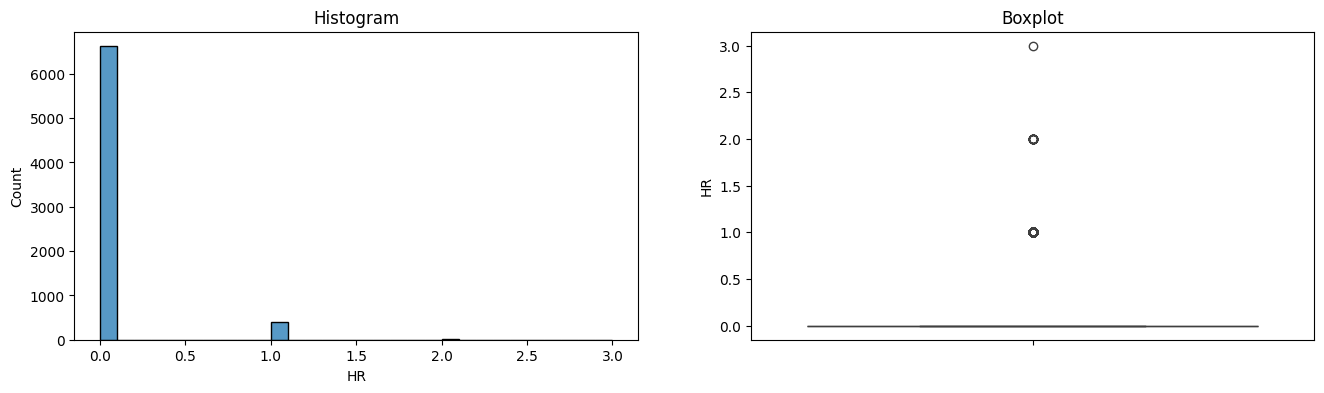

AR - Before Capping


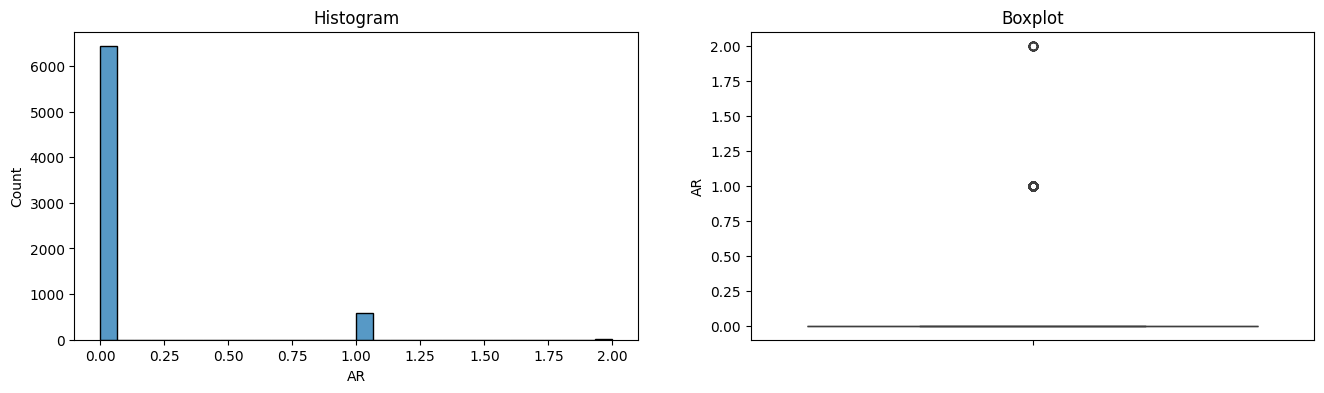


AR - After Capping


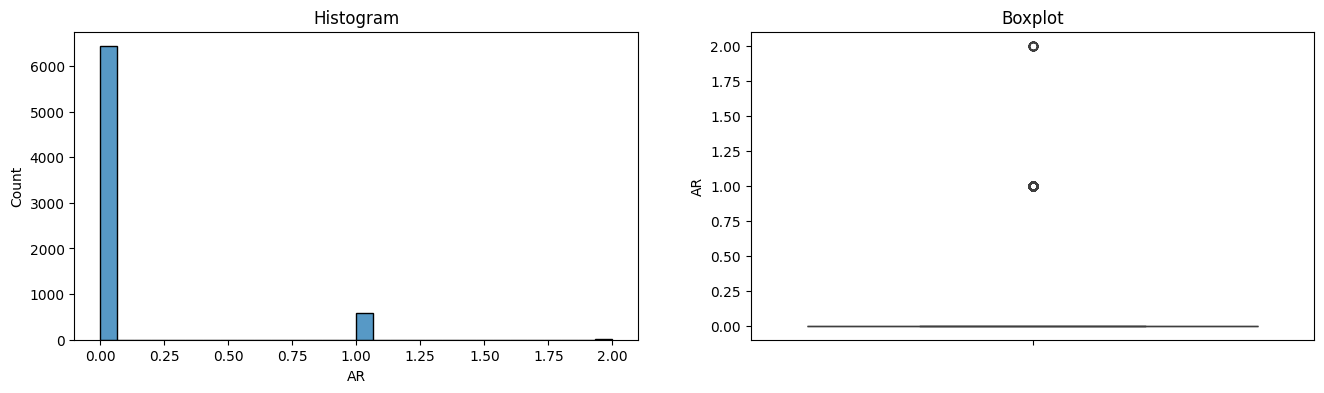

In [31]:
# membuat variabel yang berisi kolom yang mempunyai outlier saja
haveOutlier
# loop
for col in haveOutlier:
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_capped, col)

## Feature Selection

Memisahkan kolom nominal dan numerical untuk pengecekan korelasi.

In [32]:
nominal = ['HomeTeam','AwayTeam','HTR']

numerical = ['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HC','AC','HF','AF','HY','AY','HR','AR']

### Correlation

In [33]:
# Nominal kolom
nominal

# Set the significance level (alpha)
alpha = 0.05

# chi square untuk nominal kolom
correlation_df_nominal = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

for cat_column in nominal:
    contingency_table = pd.crosstab(X_train_capped[cat_column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    # menggunakan concat untuk menggabungkan dataframes
    correlation_df_nominal = pd.concat([
        correlation_df_nominal,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the chi-squared test 
correlation_df_nominal

,categorical_column,chi2-statistic,p-value,is_correlated
0,HomeTeam,613.558094,1.349702e-80,Yes
1,AwayTeam,623.299468,2.000710e-82,Yes
2,HTR,2949.694862,0.000000e+00,Yes


**Kolom yang mempunyai korelasi terhadap target adalah:**
- `HomeTeam`
- `AwayTeam`
- `HTR`

In [34]:
# Numerical kolom
numerical

# Set the significance level (alpha)
alpha = 0.05

# spearman untuk numerical kolom
correlation_df_num = pd.DataFrame(columns=['numerical column', 'correlation-statistic', 'p-value', 'is_correlated'])

for cont_column in numerical:
    corr, p = spearmanr(X_train_capped[cont_column], y_train)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    correlation_df_num = pd.concat([
        correlation_df_num,
        pd.DataFrame({'numerical column': [cont_column], 'correlation-statistic': [corr], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)

# Print the correlation test 
correlation_df_num

,numerical column,correlation-statistic,p-value,is_correlated
0,FTHG,-0.570149,0.000000e+00,Yes
1,FTAG,0.345557,9.120870e-197,Yes
2,HTHG,-0.376928,1.104383e-236,Yes
3,HTAG,0.216018,3.607447e-75,Yes
4,HS,-0.151828,1.339672e-37,Yes
5,AS,0.137323,5.267982e-31,Yes
6,HST,-0.248537,1.170133e-99,Yes
7,AST,0.161798,1.573342e-42,Yes
8,HC,-0.016962,1.545680e-01,No
9,AC,0.018028,1.302714e-01,No


**Kolom yang mempunyai korelasi terhadap target adalah:**
- `FTHG`
- `FTAG`
- `HTHG`
- `HTAG`
- `HS`
- `AS`
- `HST`
- `AST`
- `HF`
- `AF`
- `HY`
- `HR`
- `AR`

In [35]:
nominal = ['HomeTeam','AwayTeam','HTR']

numerical = ['FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HY','HR','AR']


print(f'final column that will be used are : {len(nominal+numerical)} columns in total')


final column that will be used are : 16 columns in total


## Encoding, PCA, dan Scalling

Melakukan Encoding, PCA atau dimensional reduction dan scalling kedalam satu pipeline.

## Pipeline

In [36]:
# scaller
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler()), # menggunakan MinMax untuk distribusi data skew
    ('pca', PCA(n_components=0.95)) # meretain 95% data menggunakan PCA
])

# encoder
nom_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, numerical), # numerical column
    ('pipe_cat', nom_pipeline, nominal) # nominal column
])

# Model Definition and Training

In [37]:
# Function untuk performance check berdasarkan f1 score
def performance_check(clf, X, y):
  y_pred = clf.predict(X)

  return f1_score(y, y_pred, average='micro')

## K-Nearest Neighbors (KNN)

In [38]:
# pipeline untuk KNN
clfKNN = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())
clfKNN.fit(X_train_capped, y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['FTHG', 'FTAG', 'HTHG',
                                                   'HTAG', 'HS', 'AS', 'HST',
                                                   'AST', 'HF', 'AF', 'HY',
                                                   'HR', 'AR']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomeTeam', 'AwayTeam',
                                                   'HTR'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [39]:
# Train the model on the entire training set
clfKNN.fit(X_train_capped, y_train)

# Predict on training and test sets
y_train_pred = clfKNN.predict(X_train_capped)
y_test_pred = clfKNN.predict(X_test_capped)

# Generate classification reports
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3228
           1       0.80      0.83      0.81      2044
           2       0.74      0.53      0.62      1773

    accuracy                           0.79      7045
   macro avg       0.78      0.76      0.76      7045
weighted avg       0.79      0.79      0.79      7045


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       575
           1       0.74      0.75      0.74       373
           2       0.53      0.35      0.42       296

    accuracy                           0.71      1244
   macro avg       0.67      0.66      0.66      1244
weighted avg       0.70      0.71      0.70      1244



**Short Insight**
-  adanya kelemahan untuk klasifikasi kelas 2 dalam train dan test

In [40]:
# check cross validation score
f1_train_cross_val = cross_val_score(clfKNN,
                                     X_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring="f1_micro")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))
print('F1 - Train : ', performance_check(clfKNN, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(clfKNN, X_test_capped, y_test))

F1 Score - All - Cross Validation  :  [0.71823989 0.73811214 0.70049681 0.70262598 0.70546487]
F1 Score - Mean - Cross Validation :  0.7129879347054648
F1 Score - Std - Cross Validation  :  0.013991450992592316
F1 Score - Range of Test-Set       :  0.6989964837128725 - 0.7269793856980572
F1 - Train :  0.7943222143364088
F1 - Test  :  0.7130225080385852


**Short Insight**
- Model memiliki average score CV yang lumayan oke sebesar 71%
- Model memiliki nilai Std yang kecil dimana model dapat bekerja secara konsisten disetiap foldnya
- Skor train test cukup bagus

## Support Vector Machine (SVM)

In [41]:
# pipeline untuk SVM
clfSVM = make_pipeline(preprocessing_pipeline, SVC(probability=True)) # menggunakan probability agar bisa melihat probabilitas prediksi
clfSVM.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['FTHG', 'FTAG', 'HTHG',
                                                   'HTAG', 'HS', 'AS', 'HST',
                                                   'AST', 'HF', 'AF', 'HY',
                                                   'HR', 'AR']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomeTeam', 'AwayTeam',
                                                   'HTR'])])),
                ('svc', SVC(probability=True))])

In [42]:
# Predict on training and test sets
y_train_pred = clfSVM.predict(X_train_capped)
y_test_pred = clfSVM.predict(X_test_capped)

# classification reports
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3228
           1       1.00      1.00      1.00      2044
           2       1.00      1.00      1.00      1773

    accuracy                           1.00      7045
   macro avg       1.00      1.00      1.00      7045
weighted avg       1.00      1.00      1.00      7045


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       575
           1       1.00      0.99      1.00       373
           2       0.98      1.00      0.99       296

    accuracy                           1.00      1244
   macro avg       0.99      1.00      0.99      1244
weighted avg       1.00      1.00      1.00      1244



**Short Insight**
- skor yang sangat bangus untuk nilai train dan testnya

In [43]:
# check cross validation score
f1_train_cross_val = cross_val_score(clfSVM,
                                     X_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring="f1_micro")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))
print('F1 - Train : ', performance_check(clfSVM, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(clfSVM, X_test_capped, y_test))

F1 Score - All - Cross Validation  :  [0.99574166 0.99503194 0.99574166 0.99929028 0.99432221]
F1 Score - Mean - Cross Validation :  0.9960255500354862
F1 Score - Std - Cross Validation  :  0.001715123630034707
F1 Score - Range of Test-Set       :  0.9943104264054515 - 0.9977406736655209
F1 - Train :  0.9995741660752306
F1 - Test  :  0.9951768488745981


**Short Insight**
- Model memiliki average score CV yang sangat bagus sebesar 99%
- Model memiliki nilai Std yang kecil dimana model dapat bekerja secara konsisten disetiap foldnya
- Skor train test sangat bagus dan memiliki selisih yang sangat kecil

## Decision Tree

In [44]:
# pipeline untuk Decision Tree
clfDT = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())
clfDT.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['FTHG', 'FTAG', 'HTHG',
                                                   'HTAG', 'HS', 'AS', 'HST',
                                                   'AST', 'HF', 'AF', 'HY',
                                                   'HR', 'AR']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomeTeam', 'AwayTeam',
                                                   'HTR'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [45]:
# Predict on training and test sets
y_train_pred = clfDT.predict(X_train_capped)
y_test_pred = clfDT.predict(X_test_capped)

# classification reports
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3228
           1       1.00      1.00      1.00      2044
           2       1.00      1.00      1.00      1773

    accuracy                           1.00      7045
   macro avg       1.00      1.00      1.00      7045
weighted avg       1.00      1.00      1.00      7045


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       575
           1       0.94      0.93      0.94       373
           2       0.87      0.87      0.87       296

    accuracy                           0.93      1244
   macro avg       0.92      0.92      0.92      1244
weighted avg       0.93      0.93      0.93      1244



**Short Insight**
- indikasi overfitting dan selisih train dan test yang lumayan besar

In [46]:
# check cross validation score
f1_train_cross_val = cross_val_score(clfDT,
                                     X_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring="f1_micro")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))
print('F1 - Train : ', performance_check(clfDT, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(clfDT, X_test_capped, y_test))

F1 Score - All - Cross Validation  :  [0.91909155 0.92689851 0.92547906 0.91767211 0.91057488]
F1 Score - Mean - Cross Validation :  0.9199432221433641
F1 Score - Std - Cross Validation  :  0.005876576733707427
F1 Score - Range of Test-Set       :  0.9140666454096567 - 0.9258197988770716
F1 - Train :  1.0
F1 - Test  :  0.9340836012861736


**Short Insight**
- Model memiliki average score CV yang bagus sebesar 91%
- Model memiliki nilai Std yang kecil dimana model dapat bekerja secara konsisten disetiap foldnya
- Adanya indikasi overfitting pada train, dan selisih yang besar antara train dan test.

## Random Forest

In [47]:
# pipeline untuk Random Forest
clfRF = make_pipeline(preprocessing_pipeline, RandomForestClassifier())
clfRF.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['FTHG', 'FTAG', 'HTHG',
                                                   'HTAG', 'HS', 'AS', 'HST',
                                                   'AST', 'HF', 'AF', 'HY',
                                                   'HR', 'AR']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomeTeam', 'AwayTeam',
                                                   'HTR'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [48]:
# Predict on training and test sets
y_train_pred = clfRF.predict(X_train_capped)
y_test_pred = clfRF.predict(X_test_capped)

# classification reports
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3228
           1       1.00      1.00      1.00      2044
           2       1.00      1.00      1.00      1773

    accuracy                           1.00      7045
   macro avg       1.00      1.00      1.00      7045
weighted avg       1.00      1.00      1.00      7045


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       575
           1       0.97      0.96      0.97       373
           2       0.93      0.86      0.89       296

    accuracy                           0.95      1244
   macro avg       0.95      0.94      0.94      1244
weighted avg       0.95      0.95      0.95      1244



**Short Insight**
- Adanya indikasi overfitting
- seperti model sebelumnya, score pada klasifikasi kelas 2 paling rendah

In [49]:
# check cross validation score
f1_train_cross_val = cross_val_score(clfRF,
                                     X_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring="f1_micro")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))
print('F1 - Train : ', performance_check(clfRF, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(clfRF, X_test_capped, y_test))

F1 Score - All - Cross Validation  :  [0.94960965 0.94464159 0.93754436 0.94535131 0.93612491]
F1 Score - Mean - Cross Validation :  0.9426543647977288
F1 Score - Std - Cross Validation  :  0.0050664494812135644
F1 Score - Range of Test-Set       :  0.9375879153165152 - 0.9477208142789424
F1 - Train :  1.0
F1 - Test  :  0.9501607717041801


**Short Insight**
- Model memiliki average score CV sebesar 94%
- Model memiliki nilai Std yang kecil dimana model dapat bekerja secara konsisten disetiap foldnya
- Skor train terindikasi overfitting dengan skor 1.0

## Hyperparameter Tuning

Melakukan hyperparameter tuning kepada 2 model yaitu SVM dan KNN. pemilihan model SVM dikarenakan skor train test dan konsistensi fold yang sangat bagus, lalu KNN yang masih memiliki potensi untuk menjadi model yang lebih baik.

## SVM Tuning

In [50]:
# menentukan range parameter
param_grid = {'svc__C': [0.01, 1.3, 1.4, 1.5, 1.6],
              'svc__gamma': [0.01, 0.05, 0.08, 0.1, 0.2],
              'svc__kernel':['rbf','linear']}

gridsvc = RandomizedSearchCV(clfSVM, param_distributions=param_grid, cv=5, n_iter=20,random_state=46,n_jobs=-1,scoring='f1_micro')
gridsvc.fit(X_train_capped, y_train)

# Print
print('--- Randomized SearchCV Results ---')
print('Best cross-validation :', gridsvc.best_score_)
print('Best parameters:', gridsvc.best_params_)

--- Randomized SearchCV Results ---
Best cross-validation : 0.9988644428672817
Best parameters: {'svc__kernel': 'linear', 'svc__gamma': 0.01, 'svc__C': 1.4}


**Short Insight**
- Parameter untuk SVM yang akan digunakan adalah:
  - Kernel : Linear
  - Gammar : 0.01
  - C : 1.4
- Dengan score CV sebesar 99%

In [51]:
# Get Best Estimator
best_estimatorsvc = gridsvc.best_estimator_
best_estimatorsvc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['FTHG', 'FTAG', 'HTHG',
                                                   'HTAG', 'HS', 'AS', 'HST',
                                                   'AST', 'HF', 'AF', 'HY',
                                                   'HR', 'AR']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomeTeam', 'AwayTeam',
                                                   'HTR'])])),
                ('svc',
                 SVC(C=1.4, gamma=0.01, kernel='linear', probability=True))])

In [52]:
# Check the Performance before tuning
print('Before Tuning: ')
cv_results = cross_val_score(clfSVM, X_train_capped, y_train, cv=5, scoring='f1_micro')

print(f"Cross-Validation Scores: {cv_results}")
print(f"Mean CV Score: {cv_results.mean()}")
print('F1 - Train : ', performance_check(clfSVM, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(clfSVM, X_test_capped, y_test))

Before Tuning: 
Cross-Validation Scores: [0.99574166 0.99503194 0.99574166 0.99929028 0.99432221]
Mean CV Score: 0.9960255500354862
F1 - Train :  0.9995741660752306
F1 - Test  :  0.9951768488745981


In [53]:
# Check the Performance after tuning
print('After Tuning: ')
# Extract and print cross-validation recall scores for each fold
cv_results = gridsvc.cv_results_
f1_scores = cv_results['mean_test_score']

print(f'Cross-Validation  Scores for each fold: {f1_scores}')
print(f'Mean CV  Score: {f1_scores.mean()}')
print('F1 - Train : ', performance_check(best_estimatorsvc, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(best_estimatorsvc, X_test_capped, y_test))

After Tuning: 
Cross-Validation  Scores for each fold: [0.73158268 0.99858055 0.73158268 0.99858055 0.79886444 0.99843861
 0.99858055 0.60454223 0.99886444 0.73158268 0.60482612 0.99772889
 0.4581973  0.99858055 0.99843861 0.9987225  0.9987225  0.99858055
 0.99858055 0.73158268]
Mean CV  Score: 0.8687579843860893
F1 - Train :  0.9991483321504613
F1 - Test  :  0.997588424437299


Perbandingan Sebelum dan Sesudah Tuning:
- Terjadi penurunan pada score cross-validation atau penuruan pada konsistensi model
- Terjadi peningkatan pada hasil Test namun penurunan pada hasil Train

### KNN tuning

In [54]:
# Define the parameter grid for KNN
param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1, 21),  # Adjust range for neighbors
              'kneighborsclassifier__weights': ['uniform', 'distance']}  # Adjust weight options

# Create a RandomizedSearchCV object for KNN pipeline
grid_random = RandomizedSearchCV(clfKNN, param_distributions=param_grid, cv=5, n_iter=10, random_state=42, n_jobs=-1, scoring='f1_micro')  # Adjust 'scoring' metric as needed
grid_random.fit(X_train_capped, y_train)

# Print results for RandomizedSearchCV
print('--- Randomized SearchCV Results ---')
print('Best cross-validation accuracy:', grid_random.best_score_)
print('Best parameters:', grid_random.best_params_)

--- Randomized SearchCV Results ---
Best cross-validation accuracy: 0.7453513129879348
Best parameters: {'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__n_neighbors': np.int64(14)}


**Short Insight**
- Parameter untuk KNN yang akan digunakan adalah:
  - weights : Uniform
  - n neighbors : 14
- Dengan peningkatan score CV menjadi 74%

In [55]:
# Get Best Estimator
best_estimatorknn = grid_random.best_estimator_
best_estimatorknn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['FTHG', 'FTAG', 'HTHG',
                                                   'HTAG', 'HS', 'AS', 'HST',
                                                   'AST', 'HF', 'AF', 'HY',
                                                   'HR', 'AR']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomeTeam', 'AwayTeam',
                                                   'HTR'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=np.int64(14)))])

In [56]:
# Check the Performance before tuning
print('Before Tuning: ')
cv_results = cross_val_score(clfKNN, X_train_capped, y_train, cv=5, scoring='f1_micro')

print(f"Cross-Validation Scores: {cv_results}")
print(f"Mean CV Score: {cv_results.mean()}")
print('F1 - Train : ', performance_check(clfKNN, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(clfKNN, X_test_capped, y_test))

Before Tuning: 
Cross-Validation Scores: [0.71823989 0.73811214 0.70049681 0.70262598 0.70546487]
Mean CV Score: 0.7129879347054648
F1 - Train :  0.7943222143364088
F1 - Test  :  0.7130225080385852


In [57]:
# Check the Performance after tuning
print('After Tuning: ')
# Extract and print cross-validation recall scores for each fold
cv_results = grid_random.cv_results_
f1_scores = cv_results['mean_test_score']

print(f'Cross-Validation  Scores for each fold: {f1_scores}')
print(f'Mean CV  Score: {f1_scores.mean()}')
print('F1 - Train : ', performance_check(best_estimatorknn, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(best_estimatorknn, X_test_capped, y_test))

After Tuning: 
Cross-Validation  Scores for each fold: [0.7310149  0.74251242 0.72519517 0.74535131 0.67565649 0.73612491
 0.73484741 0.73995742 0.73598297 0.70418737]
Mean CV  Score: 0.7270830376153301
F1 - Train :  0.7947480482611782
F1 - Test  :  0.7717041800643086


Perbandingan Sebelum dan Sesudah dituning:
-  Adanya peningkatan score cross-validation menjadi 72%
-  Peningkatan pada hasil Test menjadi 0.77
-  model KNN menjadi lebih baik setelah dilakukannya hyperparameter tuning

## Boosting

Boosting dilakukan untuk meningkatkan kinerja model prediksi dengan menggabungkan beberapa model lemah (weak learners) menjadi satu model kuat (strong learner)

### SVM

Pada dasarnya model SVM bukan model lemah sehingga melakukan boosting memberikan bobot yang sangat besar pada komputasional

In [58]:
# pipeline untuk KNN
boostedSVM = make_pipeline(preprocessing_pipeline, AdaBoostClassifier(SVC(kernel='linear',C=1.4, gamma= 0.01, probability=True,random_state=46 ),
    n_estimators=50,
    random_state=46))
boostedSVM.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['FTHG', 'FTAG', 'HTHG',
                                                   'HTAG', 'HS', 'AS', 'HST',
                                                   'AST', 'HF', 'AF', 'HY',
                                                   'HR', 'AR']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomeTeam', 'AwayTeam',
                                                   'HTR'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=SVC(C=1.4, gamma=0.01,
                                                  kernel='linear',
                                                  probability=True,
                                                  random_state=46),
                                    random_state=46))])

Penggunaan AdaBoost terhadap model SVM bertujuan untukmenjadi satu model yang kuat  dengan cara mengoreksi kesalahan dari model-model sebelumnya.

In [59]:
# Model Evaluation

print('F1 - Train : ', performance_check(boostedSVM, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(boostedSVM, X_test_capped, y_test))

F1 - Train :  0.7481902058197303
F1 - Test  :  0.7604501607717041


Dikarenakan Model SVM sudah sangat kuat dan memiliki score yang bagus, hasil boost malah menghasilkan value yang rendah dengan komputasional sangat besar.

### KNN

KNN menggunakan BaggingClassifier dikarenakan Adaboost tidak mensupport model KNN.

In [60]:
# pipeline untuk KNN
boosted = make_pipeline(preprocessing_pipeline, BaggingClassifier(KNeighborsClassifier(n_neighbors=14, weights= 'uniform'),
    n_estimators=100,
    random_state=46))
boosted.fit(X_train_capped, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.95))]),
                                                  ['FTHG', 'FTAG', 'HTHG',
                                                   'HTAG', 'HS', 'AS', 'HST',
                                                   'AST', 'HF', 'AF', 'HY',
                                                   'HR', 'AR']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['HomeTeam', 'AwayTeam',
                                                   'HTR'])])),
                ('baggingclassifier',
                 BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=14),
                                   n_estimators=100, random_state=46))])

In [61]:
# Check the Performance before tuning
print('CV after boosting: ')
cv_results = cross_val_score(boosted, X_train_capped, y_train, cv=5, scoring='f1_micro')

print(f"Cross-Validation Scores: {cv_results}")
print(f"Mean CV Score: {cv_results.mean()}")

# Model Evaluation

print('F1 - Train : ', performance_check(boosted, X_train_capped, y_train))
print('F1 - Test  : ', performance_check(boosted, X_test_capped, y_test))

CV after boosting: 
Cross-Validation Scores: [0.74378992 0.75940383 0.75159688 0.73598297 0.74946771]
Mean CV Score: 0.7480482611781405
F1 - Train :  0.7970191625266146
F1 - Test  :  0.770096463022508


Adanya peningkatan pada performa kinerja KNN setelah diboosting walaupun mengakibatkan komputasional yang besar jika dibandingkan dengan sebelumnya. Hasil test semakin meningkat walaupun hasil train dan cv tidak jauh berbeda.

# Model Evaluation

## Before Tuning

### KNN 
- Score - All - Cross Validation  :  [0.71823989 0.73811214 0.70049681 0.70262598 0.70546487]
- Score - Mean - Cross Validation :  0.7129879347054648
- Score - Std - Cross Validation  :  0.013991450992592316
- F1 - Train :  0.7943222143364088
- F1 - Test  :  0.7130225080385852

**Kesimpulan** : KNN menunjukkan hasil yang relatif konsisten pada nilai cross-validation dengan nilai 0.71, namun skor Train dan Test tidak terlalu tinggi. Model ini tidak overfitting namun performanya tidak sebaik model lain, sehingga butuh dilakukannya tuning agar bisa meningkatkan performa model

Kelebihan :
- Model memiliki konsistensi yang cukup
- Variabilitas antar fold yang kecil

Kelemahan:
- Performa rendah pada Test

### SVM
- Score - All - Cross Validation  :  [0.99574166 0.99503194 0.99574166 0.99929028 0.99432221]
- Score - Mean - Cross Validation :  0.9960255500354862
- Score - Std - Cross Validation  :  0.001715123630034707
- F1 - Train :  0.9995741660752306
- F1 - Test  :  0.9951768488745981

**Kesimpulan** : SVM menunjukkan hasil yang sangat tinggi dan konsisten pada nilai cross-validation dengan nilai 0.99, dan nilai deviation sebesar 0.0017 yang sangat rendah menandakan model sangat konsisten pada setiap foldnya. lalu skor Train dan Test yang sangat bagus, dimana model dapat memprediksi true positive dengan sangat akurat dan mengurangi resiko false negative dengan sangat baik.

Kelebihan : 
- Model memiliki konsistensi yang sangat bagus, konsistensi sebesar 99%
- Performa sangat bagus pada Train dan Test, yang menandakan keseimbangan pada recall dan precision

Kelemahan :
- Model ini membutuhkan komputasi yang sangat besar

### Decision Tree
- Score - All - Cross Validation  :  [0.91696238 0.92618879 0.92547906 0.91625266 0.90915543]
- Score - Mean - Cross Validation :  0.9188076650106458
- Score - Std - Cross Validation  :  0.006357472158001055
- F1 - Train :  1.0
- F1 - Test  :  0.9332797427652733

**Kesimpulan** : Decision Tree menunjukkan hasil yang bagus pada konsistensi atau nilai cross-validation dengan nilai 0.91, namun Train Test menunjukkan adanya overfitting, dimana model ini sangat bagus pada saat training namun kurang baik saat melakukan test. 

Kelebihan :
- Model memiliki konsistensi yang bagus
- Performa bagus pada saat melakukan test

Kelemahan :
- Overfitting pada training, sehingga model akan susah memprediksi data baru dikarenakan model terlalu terpaku pada data training.


### Random Forest
- F1 Score - All - Cross Validation  :  [0.94322214 0.94464159 0.94464159 0.94535131 0.92618879]
- F1 Score - Mean - Cross Validation :  0.9408090844570618
- F1 Score - Std - Cross Validation  :  0.0073428060504627975
- F1 - Train :  1.0
- F1 - Test  :  0.9501607717041801

**Kesimpulan** : Random Forest juga menunjukkan nilai konsistensi yang bagus dengan nilai 0.94, namun tidak berbeda jauh dengan Decision Tree dimana adanya overfitting pada Train dan Test

Kelebihan :
- Konsistensi lebih bagus dari model Decisiton Tree.
- Performa bagus pada test

Kekurangan :
- Overfitting pada training.
- Dibutuhkan komputasi yang tinggi.

## After Tuning
Berdasarkan hasil analisa terhadap 4 base model diatas, maka 2 model akan diuji dengan melakukan hyperparameter tuning, model pertama adalah model SVM dengan skor yang sudah sangat bagus dan model KNN dimana model ini masih memiliki potensi untuk menjadi lebih baik.

### SVM
- Cross-Validation  Scores for each fold: [0.73158268 0.99858055 0.73158268 0.99858055 0.79886444 0.99843861
 0.99858055 0.60454223 0.99886444 0.73158268 0.60482612 0.99772889
 0.4581973  0.99858055 0.99843861 0.9987225  0.9987225  0.99858055
 0.99858055 0.73158268]
- Mean CV  Score: 0.8687579843860893
- F1 - Train :  0.9991483321504613
- F1 - Test  :  0.997588424437299

**Kesimpulan** : 

Kelebihan :
- Performa meningkat pada hasil Train dan Test

Kelemahan:
- Peningkatan performa yang kecil
- Konsistensi model yang menurun sangat jauh dibandingkan dengan sebelum dilakukannya tuning
- Variabilitas yang tinggi pada score setiap fold
- Komputasi yang tinggi untuk hanya meningkatkan kinerja yang sangat kecil

### KNN
- Cross-Validation  Scores for each fold: [0.7310149  0.74251242 0.72519517 0.74535131 0.67565649 0.73612491
 0.73484741 0.73995742 0.73598297 0.70418737]
- Mean CV  Score: 0.7270830376153301
- F1 - Train :  0.7947480482611782
- F1 - Test  :  0.7717041800643086

**Kesimpulan** :

Kelebihan : 
-  Performa Train dan Test yang meningkat
-  Konsistensi model yang meningkat
-  Variabilitas pada score fold stabil
  
Kekurangan :
- Walaupun performa meningkat, tetapi performa yang meningkat relatif kecil
- Komputasi yang besar untuk peningkatan yang relatif kecil

## Boosting
Dilakukan boosting terhadap 2 model yaitu KNN dan SVM, dimana KNN menggunakan StackingClassifier dan SVM dengan AdaBoostClassifier. Penggunaan StackingClassifier terhadap KNN dikarenakan AdaBoostClassifier tidak support model KNN.

### SVM
- F1 - Train :  0.7481902058197303
- F1 - Test  :  0.7604501607717041

**Kesimpulan** : 

Kelebihan : 
- Tidak ada kelebihan pada model SVM yang sudah di boost dengan AdaBoostClassifier

Kelemahan :
- Performa menurun dengan sangat signifikan
- Komputasi yang sangat besar sehingga tidak dapat dilakukannya pengecekan terhadap nilai cross-validation

### KNN
- Cross-Validation Scores: [0.74 0.76 0.75 0.74 0.75]
- Mean CV Score: 0.7480482611781405
- F1 - Train :  0.7970191625266146
- F1 - Test  :  0.770096463022508

**Kesimpulan** : 

Kelebihan :
- Performa meningkat setelah dilakukannya boost
- Peningkatan pada konsistensi model

Kelemahan :
- Nilai performa yang meningkat relatif kecil
- Model membutuhkan komputasi yang besar hanya untuk meningkatkan performa yang relatif kecil.


Maka berdasrkan analisa hasil pengujian setiap model dari sebelum dilakukannya tuning, tuning dan boosting, maka model SVM sebelum dilakukannya tuning dan boosting menjadi pilihan terbaik. model SVM default menjadi pilihan terbaik dikarenakan model SVM memiliki nilai konsistensi yang sangat bagus yaitu sebesar 99% dan memiliki score Train dan Test yang sangat bagus. 

## Confusion Matrix

In [62]:
# Predict on training and test sets
y_train_pred = clfSVM.predict(X_train_capped)
y_test_pred = clfSVM.predict(X_test_capped)

# classification reports
print("Classification Report - Training Set:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report - Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report - Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3228
           1       1.00      1.00      1.00      2044
           2       1.00      1.00      1.00      1773

    accuracy                           1.00      7045
   macro avg       1.00      1.00      1.00      7045
weighted avg       1.00      1.00      1.00      7045


Classification Report - Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       575
           1       1.00      0.99      1.00       373
           2       0.98      1.00      0.99       296

    accuracy                           1.00      1244
   macro avg       0.99      1.00      0.99      1244
weighted avg       1.00      1.00      1.00      1244



Confusion Matrix SVM      : 


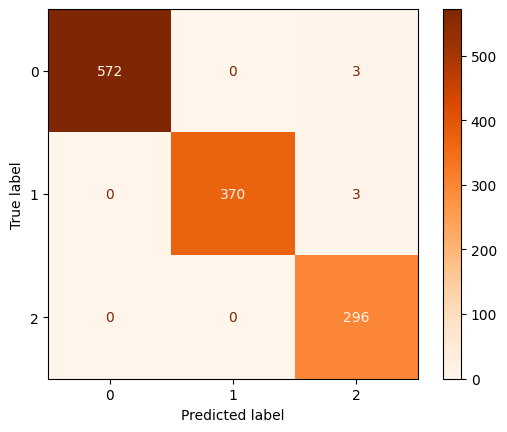

In [63]:
print('Confusion Matrix SVM      : \n', ConfusionMatrixDisplay.from_estimator(clfSVM, X_test_capped, y_test, cmap='Oranges' ))

**Confusion Matrix**

|                     | Predicted: Home Win (0) | Predicted: Away Win (1) | Predicted: Draw (2) |
|---------------------|--------------------------|--------------------------|----------------------|
| Actual Home Win (0) | 572                      | 0                        | 3                    |
| Actual Away Win (1) | 0                        | 370                      | 3                    |
| Actual Draw (2)     | 0                        | 0                        | 296                  |


**Kelas 0 = home win** <br>
TP : prediksi benar dengan hasil actual <br>
FP : match bukan home win tapi diprediksi home win <br>
FN : match home win tapi diprediksi sebagai tidak home win <br>

**Kelas 1 = away win** <br>
TP : prediksi benar dengan hasil actual <br>
FP : prediksi match bukan away win tapi diprediksi away win <br>
FN : prediksi match away win tapi diprediksi sebagai tidak away win <br>

**Kelas 2 = draw** <br>
TP : prediksi benar dengan hasil actual <br>
FP : prediksi match bukan draw tapi diprediksi draw <br>
FN : prediksi match draw tapi diprediksi sebagai tidak draw <br>

**Home win (0)**
- True Positive(TP) : 572 atau model dapat memprediksi kelas home win dengan benar sebanyak 572
- False Positive(FP) : Tidak ada
- False Negativ(FN) :  3 atau model memprediksi homewin tapi sebenarnya draw

**Away win(1)**
- True Positive(TP) : 370 atau model dapat memprediksi kelas away win dengan benar sebanyak 370
- False Positive(FP) : Tidak ada
- False Negative(FN) : 3 atau model memprediksi Away win tapi sebenarnya draw

**Draw(2)**
- True Positive(TP) : 296 atau model dapat memprediksi kelas Draw dengan benar sebanyak 296
- False Positive(FP) : 6 atau model 3 kali memprediksi Home win sebagai Draw dan 3 kali memprediksi Away Win sebagai Draw
- False Negative(FN): Tidak ada

Precision yang lemah pada kelas 2 dan kuat dikelas lainnya dan Recall yang rendah dikelas 0 dan 1 namun kuat di kelas 2

### Melihat Hasil Confusion Matrix pada Data

Menggabungkan hasil prediksi dan data test untuk melakukan perbandingan side-by-side

In [64]:
# menggabungkan x test capped dengan y test
conf = pd.concat([X_test_capped, y_test], axis=1)
conf

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR
9396,Burnley,Swansea,2.0,0,2.0,0.0,H,16.0,13.0,7.0,1.0,8.0,6.0,12.0,12.0,1.0,1.0,0.0,0.0,0
9106,Leicester,Chelsea,0.0,3,0.0,1.0,A,7.0,8.0,2.0,3.0,3.0,5.0,8.0,9.0,1.0,0.0,0.0,0.0,1
5810,Wigan,Birmingham,2.0,0,1.0,0.0,H,15.0,5.0,8.0,1.0,2.0,2.0,11.0,17.0,1.0,2.0,0.0,1.0,0
2854,Man United,Bradford,3.5,0,2.0,0.0,H,21.0,6.0,12.0,4.0,5.0,1.0,12.0,10.0,0.0,1.0,0.0,0.0,0
7440,Sunderland,Wigan,1.0,0,0.0,0.0,D,11.0,8.0,6.0,3.0,8.0,1.0,20.0,16.0,2.0,5.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,Everton,Sunderland,0.0,2,0.0,0.0,D,22.0,10.0,4.0,3.0,14.0,1.0,10.0,9.0,2.0,3.0,0.0,0.0,1
3113,Man United,Leicester,2.0,0,0.0,0.0,D,19.0,5.0,8.0,2.0,14.0,2.0,11.0,13.0,1.0,1.0,0.0,0.0,0
3249,Tottenham,Chelsea,2.0,3,0.0,1.0,A,11.0,6.0,4.0,4.0,6.0,6.0,10.0,12.0,1.0,4.0,0.0,1.0,1
7626,Fulham,Man United,0.0,1,0.0,0.0,D,15.0,13.0,8.0,8.0,5.0,8.0,8.0,15.0,1.0,1.0,0.0,0.0,1


In [65]:
# memasukan hasil prediksi
pred = clfSVM.predict(conf)
conf['predic'] = pred
conf

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,predic
9396,Burnley,Swansea,2.0,0,2.0,0.0,H,16.0,13.0,7.0,1.0,8.0,6.0,12.0,12.0,1.0,1.0,0.0,0.0,0,0
9106,Leicester,Chelsea,0.0,3,0.0,1.0,A,7.0,8.0,2.0,3.0,3.0,5.0,8.0,9.0,1.0,0.0,0.0,0.0,1,1
5810,Wigan,Birmingham,2.0,0,1.0,0.0,H,15.0,5.0,8.0,1.0,2.0,2.0,11.0,17.0,1.0,2.0,0.0,1.0,0,0
2854,Man United,Bradford,3.5,0,2.0,0.0,H,21.0,6.0,12.0,4.0,5.0,1.0,12.0,10.0,0.0,1.0,0.0,0.0,0,0
7440,Sunderland,Wigan,1.0,0,0.0,0.0,D,11.0,8.0,6.0,3.0,8.0,1.0,20.0,16.0,2.0,5.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,Everton,Sunderland,0.0,2,0.0,0.0,D,22.0,10.0,4.0,3.0,14.0,1.0,10.0,9.0,2.0,3.0,0.0,0.0,1,1
3113,Man United,Leicester,2.0,0,0.0,0.0,D,19.0,5.0,8.0,2.0,14.0,2.0,11.0,13.0,1.0,1.0,0.0,0.0,0,0
3249,Tottenham,Chelsea,2.0,3,0.0,1.0,A,11.0,6.0,4.0,4.0,6.0,6.0,10.0,12.0,1.0,4.0,0.0,1.0,1,1
7626,Fulham,Man United,0.0,1,0.0,0.0,D,15.0,13.0,8.0,8.0,5.0,8.0,8.0,15.0,1.0,1.0,0.0,0.0,1,1


### Mencari perbedaan antara hasil prediksi dan actual

In [66]:
def find_differences(df, col1, col2):
    differences = df[df[col1] != df[col2]]
    return differences

differences = find_differences(conf, 'FTR', 'predic')
dif = pd.DataFrame(differences)
dif

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,predic
5795,Bolton,Arsenal,2.0,3,2.0,0.0,H,13.0,17.0,9.0,8.0,8.0,6.0,12.0,10.000000,2.0,2.0,0.0,1.0,1,2
9029,Swansea,Crystal Palace,3.5,4,1.0,1.0,D,18.0,12.0,9.0,4.0,10.0,6.0,12.0,23.669056,4.0,5.0,0.0,0.0,0,2
8459,West Brom,Leicester,2.0,3,2.0,1.0,H,8.0,12.0,5.0,4.0,4.0,6.0,15.0,15.000000,2.0,2.0,0.0,0.0,1,2
6500,Portsmouth,Stoke,1.0,2,1.0,0.0,H,15.0,14.0,12.0,7.0,7.0,7.0,10.0,10.000000,2.0,1.0,0.0,1.0,1,2
9662,Tottenham,Leicester,3.5,4,1.0,2.0,A,14.0,16.0,6.0,9.0,4.0,4.0,9.0,13.000000,1.0,2.0,0.0,0.0,0,2
8825,Southampton,Liverpool,3.0,2,0.0,2.0,A,16.0,18.0,5.0,9.0,3.0,5.0,10.0,13.000000,1.0,3.0,0.0,0.0,0,2


Terdapat 6 row yang mengalami salah prediksi, untuk melihat karaterisik prediksi benar dan membandingkannya dengan yang salah prediksi, maka dibutuhkan untuk analisa karakteristik terlebih dahulu

In [67]:
# Filter numeric columns
numericConf = conf.select_dtypes(include=['number']).columns

# Calculate means for each condition
tp0_mean = conf[(conf['FTR'] == 0) & (conf['predic'] == 0)][numericConf].mean()
tp1_mean = conf[(conf['FTR'] == 1) & (conf['predic'] == 1)][numericConf].mean()
tp2_mean = conf[(conf['FTR'] == 2) & (conf['predic'] == 2)][numericConf].mean()

# Combine into a single DataFrame
tp_means = pd.DataFrame({
    'Home Win (0)': tp0_mean,
    'Away Win (1)': tp1_mean,
    'Draw (2)': tp2_mean
})

display(tp_means)


,Home Win (0),Away Win (1),Draw (2)
FTHG,2.302448,0.602703,0.967905
FTAG,0.522727,2.297297,0.972973
HTHG,1.037587,0.250000,0.413851
HTAG,0.229021,0.895946,0.388514
HS,14.645105,11.810811,12.918919
AS,9.513986,12.408108,10.564189
HST,7.305944,4.632432,5.540541
AST,3.920455,6.059459,4.592905
HC,5.998252,5.740541,6.351351
AC,4.622378,5.127027,4.702703


Karakteristik Prediksi Benar Setiap Kelas :

Home win:
- Home team mencetak goal lebih signifikan pada hasil half time dan fulltime
- Home team melakukan shots dan shots on target lebih banyak terhadap tim away

Away win:
- Away team mencetak goal lebih signifikan pada hasil half time dan fulltime
- Away team melakukan shots dan shots on target lebih banyak terhadap tim away
- Jumlah corner kick relatif lebih banyak Home team 

Draw:
- Statistik Balance terhadap 2 team
- Tidak adanya perbedaan yang signifikan pada rata rata jumlah goal saat half-time

Evaluasi 0: <br>
FP = prediksi 0 actual =! 0 <br>
FN = prediksi =! 0 actual = 0 <br>

Evaluasi 1: <br>
FP = prediksi 1 actual =! 1 <br>
FN = prediksi =! 1 actual = 1 <br>

Evaluasi 2: <br>
FP = prediksi 2 actual =! 2 <br>
FN = prediksi =! 2 actual = 2 <br>

### False Negative pada Kelas 0

In [68]:
fp0 = conf[(conf['FTR'] != 0) & (conf['predic'] == 0)]
display(fp0)
fn0 = conf[(conf['FTR'] == 0) & (conf['predic'] != 0)]
display(fn0)
display(fn0.describe())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,predic


,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,predic
9029,Swansea,Crystal Palace,3.5,4,1.0,1.0,D,18.0,12.0,9.0,4.0,10.0,6.0,12.0,23.669056,4.0,5.0,0.0,0.0,0,2
9662,Tottenham,Leicester,3.5,4,1.0,2.0,A,14.0,16.0,6.0,9.0,4.0,4.0,9.0,13.000000,1.0,2.0,0.0,0.0,0,2
8825,Southampton,Liverpool,3.0,2,0.0,2.0,A,16.0,18.0,5.0,9.0,3.0,5.0,10.0,13.000000,1.0,3.0,0.0,0.0,0,2


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,predic
count,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.0
mean,3.333333,3.333333,0.666667,1.666667,16.0,15.333333,6.666667,7.333333,5.666667,5.0,10.333333,16.556352,2.000000,3.333333,0.0,0.0,0.0,2.0
std,0.288675,1.154701,0.577350,0.577350,2.0,3.055050,2.081666,2.886751,3.785939,1.0,1.527525,6.159783,1.732051,1.527525,0.0,0.0,0.0,0.0
min,3.000000,2.000000,0.000000,1.000000,14.0,12.000000,5.000000,4.000000,3.000000,4.0,9.000000,13.000000,1.000000,2.000000,0.0,0.0,0.0,2.0
25%,3.250000,3.000000,0.500000,1.500000,15.0,14.000000,5.500000,6.500000,3.500000,4.5,9.500000,13.000000,1.000000,2.500000,0.0,0.0,0.0,2.0
50%,3.500000,4.000000,1.000000,2.000000,16.0,16.000000,6.000000,9.000000,4.000000,5.0,10.000000,13.000000,1.000000,3.000000,0.0,0.0,0.0,2.0
75%,3.500000,4.000000,1.000000,2.000000,17.0,17.000000,7.500000,9.000000,7.000000,5.5,11.000000,18.334528,2.500000,4.000000,0.0,0.0,0.0,2.0
max,3.500000,4.000000,1.000000,2.000000,18.0,18.000000,9.000000,9.000000,10.000000,6.0,12.000000,23.669056,4.000000,5.000000,0.0,0.0,0.0,2.0


- Data memiliki rata rata yang relatif kecil dalam perbedaan, sehingga model cenderung memprediksi outcome menjadi draw

### False Negative pada Kelas 1

In [69]:
fp1 = conf[(conf['FTR'] != 1) & (conf['predic'] == 1)]
display(fp1)
fn1 = conf[(conf['FTR'] == 1) & (conf['predic'] != 1)]
display(fn1)
display(fn1.describe())

,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,predic


,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,predic
5795,Bolton,Arsenal,2.0,3,2.0,0.0,H,13.0,17.0,9.0,8.0,8.0,6.0,12.0,10.0,2.0,2.0,0.0,1.0,1,2
8459,West Brom,Leicester,2.0,3,2.0,1.0,H,8.0,12.0,5.0,4.0,4.0,6.0,15.0,15.0,2.0,2.0,0.0,0.0,1,2
6500,Portsmouth,Stoke,1.0,2,1.0,0.0,H,15.0,14.0,12.0,7.0,7.0,7.0,10.0,10.0,2.0,1.0,0.0,1.0,1,2


,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,FTR,predic
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.0,3.000000,3.0,3.0
mean,1.666667,2.666667,1.666667,0.333333,12.000000,14.333333,8.666667,6.333333,6.333333,6.333333,12.333333,11.666667,2.0,1.666667,0.0,0.666667,1.0,2.0
std,0.577350,0.577350,0.577350,0.577350,3.605551,2.516611,3.511885,2.081666,2.081666,0.577350,2.516611,2.886751,0.0,0.577350,0.0,0.577350,0.0,0.0
min,1.000000,2.000000,1.000000,0.000000,8.000000,12.000000,5.000000,4.000000,4.000000,6.000000,10.000000,10.000000,2.0,1.000000,0.0,0.000000,1.0,2.0
25%,1.500000,2.500000,1.500000,0.000000,10.500000,13.000000,7.000000,5.500000,5.500000,6.000000,11.000000,10.000000,2.0,1.500000,0.0,0.500000,1.0,2.0
50%,2.000000,3.000000,2.000000,0.000000,13.000000,14.000000,9.000000,7.000000,7.000000,6.000000,12.000000,10.000000,2.0,2.000000,0.0,1.000000,1.0,2.0
75%,2.000000,3.000000,2.000000,0.500000,14.000000,15.500000,10.500000,7.500000,7.500000,6.500000,13.500000,12.500000,2.0,2.000000,0.0,1.000000,1.0,2.0
max,2.000000,3.000000,2.000000,1.000000,15.000000,17.000000,12.000000,8.000000,8.000000,7.000000,15.000000,15.000000,2.0,2.000000,0.0,1.000000,1.0,2.0


- Halftime result yang dimenangin oleh tim tuan rumah dengan hasil akhir tim tandang cenderung diprediksi sebagai draw

# Model Saving

Melakukan model saving, model yang akan disimpan adalah model SVM sebelum dilakukannya tuning

In [70]:
with open('model.pkl', 'wb') as file:
    pickle.dump(clfSVM, file)

# Model Inference

*Model Inference yang berisi prediksi dan penentuan odds dilakukan pada notebook berbeda.*

# Kesimpulan

**Tujuan Model:**
Model ini dirancang untuk memprediksi probabilitas kemenangan, hasil imbang, dan peluang pada pertandingan English Premier League (EPL) menggunakan dataset historis pertandingan. Tujuan utamanya adalah memberikan perkiraan hasil pertandingan dan menghasilkan nilai odds yang akurat.

**Model yang Digunakan:**
Setelah menguji berbagai model, termasuk K-Nearest Neighbors, Support Vector Machine (SVM), Decision Tree, dan Random Forest, model SVM terpilih sebagai yang terbaik berdasarkan kinerja evaluasi.

**Kinerja Model:**
Model SVM menunjukkan performa yang sangat baik dengan konsistensi sebesar 99% dan skor F1 baik pada data pelatihan maupun pengujian, masing-masing sebesar 99%. Ini menandakan bahwa model dapat memprediksi hasil pertandingan dengan risiko kesalahan yang sangat kecil dan memiliki konsistensi yang tinggi dibandingkan model lain yang diuji.

**Fitur Signifikan:**
Fitur-fitur yang berdampak signifikan terhadap prediksi meliputi Fulltime Goals (FTHG), Halftime Goals (HTHG), Halftime Away Goals (HTAG), dan Shots on Target (HST). Fitur-fitur ini berperan penting dalam meningkatkan hasil prediksi model.

**Analisis Hasil:**
Model menunjukkan akurasi yang lebih tinggi dalam memprediksi hasil kemenangan di kandang (Home Win) dan kemenangan tandang (Away Win). Namun, model cenderung memprediksi hasil imbang jika statistik data seimbang.

**Kelebihan Model:**

- Akurasi prediksi yang sangat baik.
- Konsistensi yang tinggi dalam hasil prediksi.
- Hasil Salah prediksi yang sangat kecil.

**Kelemahan Model:**

- Memerlukan komputasi yang besar
- Cenderung memprediksi hasil imbang jika data statistik seimbang.
- Dikarenakan Data yang digunakan data berdimensi yang tinggi, maka dibutuhkan input yang banyak juga untuk melakukan prediksi

Model ini efektif dalam memberikan prediksi hasil pertandingan dan estimasi probabilitas dengan akurasi tinggi. Sehingga model ini baik untuk digunakan dalam meningkatkan strategi taruhan dan mendukung pengambilan keputusan dalam penetapan nilai odds oleh agen taruhan.

# Rekomendasi

Rekomendeasi untuk Betting Agencies:
- Agar menggunakan Model ini dikarenakan model memiliki nilai akurasi, precision dan recall yang bagus. nilai precision adalah nilai prediksi yang tepat dari total jumlah prediksi, lalu recall adalah nilai yang meminimalisir prediksi yang memprediksi salah yang kenyataanya benar. 
- Fokus pada fitur fitur yang memiliki dampak signifikan untuk melakukan prediksi
- Melakukan pengaturan odds lagi setelah melakukan prediksi berdasarkan keinginan margin profit.
- Memiliki Sistem yang memiliki kapasistas memadai dikarenakan model yang membutuhkan komputasi yang besar
- Lakukan evaluasi berkala untuk memastikan kinerja model tetap bagus.

# Conceptual Problem

### Bagging

#### Apa itu Bagging?
Bootstrap Aggregating atua Bagging adalah teknik ensemble learning yang berguna untuk meningkatkan akurasi dan stabilitas algoritma machine learning dengan mengurangi jumlah varians dan mencegah terjadinya overfitting. 

### Bagaimana cara kerja Bagging?
1. Mengambil sampel acak dari beberapa subset data. setiap subset mempunyai kemungkinan untuk memiliki beberapa contoh sampel yang sama dari dataset asli
2. Setiap subset data digunakan untuk melatih model yang berbeda. model yang digunakan bisa model yang bertipe sama atau defaultnya seperti decision tree.
3. Model akan melakukan pelatihan pada subset data masing masing, lalu untuk hasil prediksi yang dihasilkan dari setiap model akan digabungkan atau di aggregate. Untuk model regresi maka hasil diambil dari rata rata dari prediksi semua model. Untuk model klasifikasi maka hasil diambil dengan voting mayoritas untuk menentukan kelas akhir

### Random Forest

#### Apa itu Random Forest?
Random Forest adalah model machine learning yang menggunakan konsep bagging. Random forest merupakan model decision tree yang dimultiply. Model ini digunakan untuk klasifikasi dan regresi.

#### Bagaimana cara kerja Random Forest?
1. mengambil sampel secara acak dari beberapa subset data.
2. Melakukan training pada setiap subset namun menggunakan parameter yang sederhana untuk mengurangi overfitting
3. Pemilihan acak untuk setiap leafnya
4. Lalu seperti yang sudah dijelaskan diatas maka model akan melakukan voting mayoritas untuk menentukan kelas akhir bagi masalah klasifikasi dan menggunakan nilai rata rata dari prediksi untuk masalah regresi.

#### Algoritma Boosting apa yang saya gunakan di notebook ini?
Pada notebook ini saya menggunakan algoritma boosting yaitu AdaBoost. saya menggunakan AdaBoost bersama dengan model SVM. walaupun model SVM bukan sebuah model yang lemah.

#### Lalu Bagaimana cara kerja AdaBoost?
AdaBoost bekerja dengan cara melatih beberapa model sederhana secara berurutan, dimana setiap model berikutnya fokus pada kesalahan yang dibuat oleh model sebelumnya.

### Apa itu Cross Validation?
Cross-Validation adalah sebuah teknik evaluasi model untuk menilai konsistensi prediksi sebuah model. Teknik ini bekerja dengan cara memisahkan data training menjadi beberapa folds, lalu melatih model pada beberapa subset, dan memvalidasi model pada subset yang tersisa. contohnya jika ada 5 folds maka salah 1nya ada fold test dan sisanya adalah fold training. hasil cross validation ini akan menggambarkan bagaimana estimasi kinerja model yang konsisten atau tidak jika bertemu data baru.